# **ALZHEIMER - ADNI**

# **Tratamiento de datos**

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)


Sat Apr 19 19:38:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 561.19                 Driver Version: 561.19         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   33C    P0             14W /   90W |       0MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
import pandas as pd

file_path = r"C:\Users\nico0\PycharmProjects\TFG\csv\DATOSJUNTOSsinprelimindiING.csv"

# Leer el archivo CSV con el delimitador correcto
df_datosjuntos = pd.read_csv(file_path, delimiter=';')

# Mostrar las primeras filas para verificar
print(df_datosjuntos.head())


   RID EXAMDATE(D)  DIAGNOSIS  DXMPTR1  DXPARK  VISDATE(N)  NXVISUAL  \
0    2  29/09/2005          1     -4.0    -4.0  17/08/2005         1   
1    2  29/09/2005          1     -4.0    -4.0  17/08/2005         1   
2    2  29/09/2005          1     -4.0    -4.0  17/08/2005         1   
3    2  29/09/2005          1     -4.0    -4.0  17/08/2005         1   
4    2  29/09/2005          1     -4.0    -4.0  17/08/2005         1   

   NXAUDITO  NXTREMOR  NXCONSCI  ...  EXAMDATE(NFL)  RECNO  PLASMA_NFL  \
0         1         1         1  ...     22/09/2010      1       253.0   
1         1         1         1  ...     22/09/2010      1       253.0   
2         1         1         1  ...     22/09/2010      1       253.0   
3         1         1         1  ...     22/09/2010      1       253.0   
4         1         1         1  ...     22/09/2010      1       253.0   

   EXAMDATE (PTAU181)  VID  PLASMAPTAU181     VISDATE  PTGENDER       PTDOB  \
0          22/09/2010    9          11939  

In [5]:
df_datosjuntos.dtypes

RID                     int64
EXAMDATE(D)            object
DIAGNOSIS               int64
DXMPTR1               float64
DXPARK                float64
VISDATE(N)             object
NXVISUAL                int64
NXAUDITO                int64
NXTREMOR                int64
NXCONSCI                int64
NXNERVE                 int64
NXMOTOR                 int64
NXFINGER                int64
NXHEEL                float64
NXSENSOR                int64
NXTENDON                int64
VISDATE(MEDH)          object
MH3HEAD                 int64
MH4CARD                 int64
MH5RESP                 int64
MH13ALLE                int64
MH14ALCH                int64
MH16SMOK                int64
MH17MALI                int64
EXAMDATE(NFL)          object
RECNO                   int64
PLASMA_NFL            float64
EXAMDATE (PTAU181)     object
VID                     int64
PLASMAPTAU181           int64
VISDATE                object
PTGENDER              float64
PTDOB                  object
PTEDUCAT  

In [6]:
import pandas as pd

columnas_fecha = ["EXAMDATE(D)", "VISDATE(N)", "VISDATE(MEDH)", "EXAMDATE(NFL)", "EXAMDATE (PTAU181)", "VISDATE", "PTDOB"]
for col in columnas_fecha:
    df_datosjuntos[col] = pd.to_datetime(df_datosjuntos[col], format="%d/%m/%Y", errors='coerce')

In [7]:
df_datosjuntos[df_datosjuntos['RID'] == 21]


,RID,EXAMDATE(D),DIAGNOSIS,DXMPTR1,DXPARK,VISDATE(N),NXVISUAL,NXAUDITO,NXTREMOR,NXCONSCI,...,EXAMDATE(NFL),RECNO,PLASMA_NFL,EXAMDATE (PTAU181),VID,PLASMAPTAU181,VISDATE,PTGENDER,PTDOB,PTEDUCAT
1456,21,2005-11-01,1,-4.0,-4.0,2005-09-28,1,1,1,1,...,2010-10-07,1,254.0,2010-10-07,9,9674,2005-09-28,2.0,1933-02-01,18.0
1457,21,2005-11-01,1,-4.0,-4.0,2005-09-28,1,1,1,1,...,2010-10-07,1,254.0,2010-10-07,9,9674,2010-10-07,2.0,1933-02-01,18.0
1458,21,2005-11-01,1,-4.0,-4.0,2005-09-28,1,1,1,1,...,2010-10-07,1,254.0,2010-10-07,9,9674,2010-10-07,NaN,NaT,NaN
1459,21,2005-11-01,1,-4.0,-4.0,2005-09-28,1,1,1,1,...,2010-10-07,1,254.0,2010-10-07,9,9674,2011-10-10,2.0,1933-02-01,18.0
1460,21,2005-11-01,1,-4.0,-4.0,2005-09-28,1,1,1,1,...,2010-10-07,1,254.0,2011-10-10,10,3745,2005-09-28,2.0,1933-02-01,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703124,21,2015-11-10,1,NaN,0.0,2010-10-07,1,1,1,1,...,2013-10-10,1,378.0,2012-10-04,11,11188,2011-10-10,2.0,1933-02-01,18.0
703125,21,2015-11-10,1,NaN,0.0,2010-10-07,1,1,1,1,...,2013-10-10,1,378.0,2013-10-10,12,9195,2005-09-28,2.0,1933-02-01,18.0
703126,21,2015-11-10,1,NaN,0.0,2010-10-07,1,1,1,1,...,2013-10-10,1,378.0,2013-10-10,12,9195,2010-10-07,2.0,1933-02-01,18.0
703127,21,2015-11-10,1,NaN,0.0,2010-10-07,1,1,1,1,...,2013-10-10,1,378.0,2013-10-10,12,9195,2010-10-07,NaN,NaT,NaN


In [8]:
df_datosjuntos.head(10)

,RID,EXAMDATE(D),DIAGNOSIS,DXMPTR1,DXPARK,VISDATE(N),NXVISUAL,NXAUDITO,NXTREMOR,NXCONSCI,...,EXAMDATE(NFL),RECNO,PLASMA_NFL,EXAMDATE (PTAU181),VID,PLASMAPTAU181,VISDATE,PTGENDER,PTDOB,PTEDUCAT
0,2,2005-09-29,1,-4.0,-4.0,2005-08-17,1,1,1,1,...,2010-09-22,1,253.0,2010-09-22,9,11939,2005-08-17,1.0,1931-04-01,16.0
1,2,2005-09-29,1,-4.0,-4.0,2005-08-17,1,1,1,1,...,2010-09-22,1,253.0,2010-09-22,9,11939,2010-09-22,1.0,1931-04-01,16.0
2,2,2005-09-29,1,-4.0,-4.0,2005-08-17,1,1,1,1,...,2010-09-22,1,253.0,2010-09-22,9,11939,2011-09-19,1.0,1931-04-01,16.0
3,2,2005-09-29,1,-4.0,-4.0,2005-08-17,1,1,1,1,...,2010-09-22,1,253.0,2011-09-19,10,12936,2005-08-17,1.0,1931-04-01,16.0
4,2,2005-09-29,1,-4.0,-4.0,2005-08-17,1,1,1,1,...,2010-09-22,1,253.0,2011-09-19,10,12936,2010-09-22,1.0,1931-04-01,16.0
5,2,2005-09-29,1,-4.0,-4.0,2005-08-17,1,1,1,1,...,2010-09-22,1,253.0,2011-09-19,10,12936,2011-09-19,1.0,1931-04-01,16.0
6,2,2005-09-29,1,-4.0,-4.0,2005-08-17,1,1,1,1,...,2010-09-22,1,253.0,2012-09-26,11,13563,2005-08-17,1.0,1931-04-01,16.0
7,2,2005-09-29,1,-4.0,-4.0,2005-08-17,1,1,1,1,...,2010-09-22,1,253.0,2012-09-26,11,13563,2010-09-22,1.0,1931-04-01,16.0
8,2,2005-09-29,1,-4.0,-4.0,2005-08-17,1,1,1,1,...,2010-09-22,1,253.0,2012-09-26,11,13563,2011-09-19,1.0,1931-04-01,16.0
9,2,2005-09-29,1,-4.0,-4.0,2005-08-17,1,1,1,1,...,2010-09-22,1,253.0,2013-09-09,12,15506,2005-08-17,1.0,1931-04-01,16.0


In [9]:
df_datosjuntos["RID"].nunique()

1191

In [10]:
# Ver la frecuencia absoluta de la columna 'DIAGNOSIS' antes de balancear
frecuencia_absoluta_original = df_datosjuntos['DIAGNOSIS'].value_counts()

print(frecuencia_absoluta_original)

DIAGNOSIS
2    353086
1    309214
3    105445
Name: count, dtype: int64


In [11]:
# Proporción de cada clase en la columna 'diagnostico'
class_proportions = df_datosjuntos['DIAGNOSIS'].value_counts(normalize=True)

print(class_proportions)

DIAGNOSIS
2    0.459900
1    0.402756
3    0.137344
Name: proportion, dtype: float64


In [12]:
num_filas = df_datosjuntos.shape[0]
print(f"El número de filas en df_datosjuntos es: {num_filas}")

El número de filas en df_datosjuntos es: 767745


In [13]:
# Ver si hay duplicados en todo el DataFrame
duplicados = df_datosjuntos.duplicated()
print(duplicados.sum())  # Número de duplicados en el DataFrame

938


In [14]:
# Eliminar duplicados directamente en el DataFrame original
df_datosjuntos.drop_duplicates(inplace=True)

In [15]:
# Check for remaining duplicates
remaining_duplicates = df_datosjuntos[df_datosjuntos.duplicated()]

if remaining_duplicates.empty:
    print("No duplicates found.")
else:
    print("Number of remaining duplicates:", len(remaining_duplicates))
    # Optionally, display the remaining duplicates:
    # print(remaining_duplicates)

No duplicates found.


In [16]:
duplicados = df_datosjuntos.duplicated()
print(duplicados.sum())  # Número de duplicados en el DataFrame

0


# **Exploracion Inicial**

In [17]:
df_datosjuntos.shape

(766807, 34)

In [18]:
# Check the shape before and after removing duplicates
print("Shape before removing duplicates:", df_datosjuntos.shape)

df_datosjuntos.drop_duplicates(inplace=True)

print("Shape after removing duplicates:", df_datosjuntos.shape)

# Check for remaining duplicates
remaining_duplicates = df_datosjuntos[df_datosjuntos.duplicated()]

if remaining_duplicates.empty:
    print("No duplicates found.")
else:
    print("Number of remaining duplicates:", len(remaining_duplicates))
    # Optionally, display the remaining duplicates:
    # print(remaining_duplicates)

Shape before removing duplicates: (766807, 34)
Shape after removing duplicates: (766807, 34)
No duplicates found.


In [19]:
import pandas as pd

# Variables de interés
variables = ["PLASMA_NFL", "PLASMAPTAU181", "PTEDUCAT"]

# Calcular medidas de tendencia central por DIAGNOSIS
estadisticas = df_datosjuntos.groupby("DIAGNOSIS")[variables].agg(["mean", "median", lambda x: x.mode().values[0] if not x.mode().empty else None])

# Renombrar la columna de moda
estadisticas.columns = ['_'.join(col).strip() for col in estadisticas.columns]
estadisticas.rename(columns={f"{var}_<lambda_0>": f"{var}_mode" for var in variables}, inplace=True)

# Mostrar resultados
print(estadisticas)

           PLASMA_NFL_mean  PLASMA_NFL_median  PLASMA_NFL_mode  \
DIAGNOSIS                                                        
1               434.283968              388.0            277.0   
2               488.294529              427.0            623.0   
3               580.589681              513.0            365.0   

           PLASMAPTAU181_mean  PLASMAPTAU181_median  PLASMAPTAU181_mode  \
DIAGNOSIS                                                                 
1                18777.102562               14704.0                9088   
2                17492.872861               15897.0               22097   
3                21102.311826               21597.0               26389   

           PTEDUCAT_mean  PTEDUCAT_median  PTEDUCAT_mode  
DIAGNOSIS                                                 
1              15.972591             16.0           16.0  
2              15.302553             16.0           16.0  
3              15.156086             16.0           18.0 

In [20]:
# Calcular la edad de los pacientes en base a la fecha de examen
#df_datosjuntos["EDAD"] = (df_datosjuntos["EXAMDATE(D)"] - df_datosjuntos["PTDOB"]).dt.days / 365.25

# Calcular la mediana de la edad por diagnóstico
#mediana_edad = df_datosjuntos.groupby("DIAGNOSIS")["EDAD"].median()
#print(mediana_edad)


In [21]:
import pandas as pd

# Calcular la media de los biomarcadores agrupando por Diagnóstico, Fumar y Beber
tabla_medias = df_datosjuntos.groupby(["DIAGNOSIS", "MH16SMOK", "MH14ALCH"])[["PLASMA_NFL", "PLASMAPTAU181"]].mean()

# Mostrar la tabla resultante
print(tabla_medias)


                             PLASMA_NFL  PLASMAPTAU181
DIAGNOSIS MH16SMOK MH14ALCH                           
1         0        0         466.372010   17104.491147
                   1         345.391155   31935.194716
          1        0         395.226077   20641.304108
                   1         378.508199   22876.534827
2         0        0         469.028856   17734.742845
                   1         357.484414   15931.803707
          1        0         523.233002   17096.732367
                   1         380.037822   18384.916165
3         0        0         589.617987   22993.133030
                   1         367.399183   31370.856948
          1        0         575.028348   15518.223043
                   1         490.452206   38148.015040


In [22]:
import pandas as pd

# Definir las variables de síntomas médicos
sintomas_medicos = ["MH3HEAD", "MH4CARD", "MH5RESP", "MH13ALLE"]

# Calcular la moda por diagnóstico
moda_sintomas_medicos = df_datosjuntos.groupby("DIAGNOSIS")[sintomas_medicos].agg(lambda x: x.mode().iloc[0])

# Mostrar la tabla resultante
print(moda_sintomas_medicos)

           MH3HEAD  MH4CARD  MH5RESP  MH13ALLE
DIAGNOSIS                                     
1                1        1        0         0
2                1        1        0         0
3                1        1        0         0


# **Frecuencia Relativa de las Variables**

In [23]:
# Eliminar las columnas que no sean de interés (fechas e identificadores)
columns_to_exclude = ['RID', 'EXAMDATE(D)', 'VISDATE(N)', 'VISDATE(MEDH)', 'EXAMDATE(NFL)', 'EXAMDATE (PTAU181)', 'VID', 'PTDOB']
df_datosjuntos_cleaned = df_datosjuntos.drop(columns=columns_to_exclude)

# Calcular la frecuencia relativa para cada variable
for column in df_datosjuntos_cleaned.columns:
    freq = df_datosjuntos_cleaned[column].value_counts(normalize=True)  # normalize=True devuelve la frecuencia relativa
    print(f"Frecuencia relativa de {column}:\n{freq}\n")

Frecuencia relativa de DIAGNOSIS:
DIAGNOSIS
2    0.459878
1    0.403227
3    0.136895
Name: proportion, dtype: float64

Frecuencia relativa de DXMPTR1:
DXMPTR1
 1.0    0.640484
-4.0    0.346654
 0.0    0.012863
Name: proportion, dtype: float64

Frecuencia relativa de DXPARK:
DXPARK
 0.0    0.546230
-4.0    0.443058
 1.0    0.010712
Name: proportion, dtype: float64

Frecuencia relativa de NXVISUAL:
NXVISUAL
1    0.930148
2    0.069852
Name: proportion, dtype: float64

Frecuencia relativa de NXAUDITO:
NXAUDITO
1    0.897114
2    0.102886
Name: proportion, dtype: float64

Frecuencia relativa de NXTREMOR:
NXTREMOR
1    0.912449
2    0.087551
Name: proportion, dtype: float64

Frecuencia relativa de NXCONSCI:
NXCONSCI
1    0.999716
2    0.000284
Name: proportion, dtype: float64

Frecuencia relativa de NXNERVE:
NXNERVE
1    0.932996
2    0.067004
Name: proportion, dtype: float64

Frecuencia relativa de NXMOTOR:
NXMOTOR
1    0.958673
2    0.041327
Name: proportion, dtype: float64

Frecuencia r

# **Frecuencia relativa por diagnosis**

In [24]:
# Obtener las columnas relevantes para analizar
columns_to_analyze = [
    'DXMPTR1', 'DXPARK', 'NXVISUAL', 'NXAUDITO', 'NXTREMOR', 'NXCONSCI',
    'NXNERVE', 'NXMOTOR', 'NXFINGER', 'NXHEEL', 'NXSENSOR', 'NXTENDON',
    'MH3HEAD', 'MH4CARD', 'MH5RESP', 'MH13ALLE', 'MH14ALCH', 'MH16SMOK',
    'MH17MALI', 'PLASMA_NFL', 'PLASMAPTAU181', 'PTGENDER', 'PTEDUCAT'
]

# Calcular la frecuencia relativa por DIAGNOSIS
for col in columns_to_analyze:
    print(f"\nFrecuencia relativa de {col} por DIAGNOSIS:")
    print(df_datosjuntos.groupby("DIAGNOSIS")[col].value_counts(normalize=True))


Frecuencia relativa de DXMPTR1 por DIAGNOSIS:
DIAGNOSIS  DXMPTR1
1          -4.0       1.000000
2           1.0       0.978439
            0.0       0.019650
           -4.0       0.001911
3          -4.0       1.000000
Name: proportion, dtype: float64

Frecuencia relativa de DXPARK por DIAGNOSIS:
DIAGNOSIS  DXPARK
1          -4.0      0.531855
            0.0      0.467793
            1.0      0.000353
2           0.0      0.544783
           -4.0      0.441942
            1.0      0.013275
3           0.0      0.782094
           -4.0      0.185288
            1.0      0.032618
Name: proportion, dtype: float64

Frecuencia relativa de NXVISUAL por DIAGNOSIS:
DIAGNOSIS  NXVISUAL
1          1           0.914556
           2           0.085444
2          1           0.932197
           2           0.067803
3          1           0.969192
           2           0.030808
Name: proportion, dtype: float64

Frecuencia relativa de NXAUDITO por DIAGNOSIS:
DIAGNOSIS  NXAUDITO
1          1      

In [25]:
# Asumiendo que 'df' es tu DataFrame y 'DIAGNOSIS' es la columna que te interesa
frecuencia_absoluta = df_datosjuntos['DIAGNOSIS'].value_counts()

# Mostrando el resultado
print(frecuencia_absoluta)

DIAGNOSIS
2    352638
1    309197
3    104972
Name: count, dtype: int64


RIDS (pacientes) que tiene DIAGNOSIS 3 y su NHEEL es = 2

In [26]:
rids_unicos1 = df_datosjuntos[(df_datosjuntos["DIAGNOSIS"] == 3) &
                                        (df_datosjuntos["NXHEEL"] == 2)]["RID"].unique()

print(rids_unicos1)  # Lista de RIDs únicos
print(len(rids_unicos1))  # Cantidad de RIDs únicos

[ 256 1226  408 4258 4625 4964 4962 4928   61 4936 4462 4138]
12


# **Tratamiento de Valores Nulos**

In [27]:
# Comprobar valores nulos en el dataframe
valores_nulos = df_datosjuntos.isnull().sum()

# Mostrar los valores nulos por cada columna
print(valores_nulos)

RID                        0
EXAMDATE(D)                0
DIAGNOSIS                  0
DXMPTR1               234414
DXPARK                   207
VISDATE(N)                 0
NXVISUAL                   0
NXAUDITO                   0
NXTREMOR                   0
NXCONSCI                   0
NXNERVE                    0
NXMOTOR                    0
NXFINGER                   0
NXHEEL                   717
NXSENSOR                   0
NXTENDON                   0
VISDATE(MEDH)              0
MH3HEAD                    0
MH4CARD                    0
MH5RESP                    0
MH13ALLE                   0
MH14ALCH                   0
MH16SMOK                   0
MH17MALI                   0
EXAMDATE(NFL)              0
RECNO                      0
PLASMA_NFL               128
EXAMDATE (PTAU181)         0
VID                        0
PLASMAPTAU181              0
VISDATE                    3
PTGENDER               77652
PTDOB                  87810
PTEDUCAT               77676
dtype: int64


In [28]:
# Ver porcentaje de valores nulos por columna
porcentaje_nulos = (df_datosjuntos.isnull().sum() / len(df_datosjuntos)) * 100
print(porcentaje_nulos)


RID                    0.000000
EXAMDATE(D)            0.000000
DIAGNOSIS              0.000000
DXMPTR1               30.570143
DXPARK                 0.026995
VISDATE(N)             0.000000
NXVISUAL               0.000000
NXAUDITO               0.000000
NXTREMOR               0.000000
NXCONSCI               0.000000
NXNERVE                0.000000
NXMOTOR                0.000000
NXFINGER               0.000000
NXHEEL                 0.093505
NXSENSOR               0.000000
NXTENDON               0.000000
VISDATE(MEDH)          0.000000
MH3HEAD                0.000000
MH4CARD                0.000000
MH5RESP                0.000000
MH13ALLE               0.000000
MH14ALCH               0.000000
MH16SMOK               0.000000
MH17MALI               0.000000
EXAMDATE(NFL)          0.000000
RECNO                  0.000000
PLASMA_NFL             0.016693
EXAMDATE (PTAU181)     0.000000
VID                    0.000000
PLASMAPTAU181          0.000000
VISDATE                0.000391
PTGENDER

In [29]:
# Filtrar la columna que tiene el DXMPTR1 de datos nulos
columna_nula = df_datosjuntos['DXMPTR1']

# Imprimir la columna
print(columna_nula)


0        -4.0
1        -4.0
2        -4.0
3        -4.0
4        -4.0
         ... 
767740    NaN
767741    NaN
767742    NaN
767743    NaN
767744    NaN
Name: DXMPTR1, Length: 766807, dtype: float64


In [30]:
# Filtrar por diagnóstico 1 y calcular porcentajes de DXMPTR1
dxptr1_diag1 = df_datosjuntos[df_datosjuntos['DIAGNOSIS'] == 1]['DXMPTR1'].value_counts(normalize=True) * 100

# Filtrar por diagnóstico 2 y calcular porcentajes de DXMPTR1
dxptr1_diag2 = df_datosjuntos[df_datosjuntos['DIAGNOSIS'] == 2]['DXMPTR1'].value_counts(normalize=True) * 100

# Filtrar por diagnóstico 3 y calcular porcentajes de DXMPTR1
dxptr1_diag3 = df_datosjuntos[df_datosjuntos['DIAGNOSIS'] == 3]['DXMPTR1'].value_counts(normalize=True) * 100

# Mostrar los resultados
print("Distribución de DXMPTR1 para Diagnóstico 1:\n", dxptr1_diag1)
print("\nDistribución de DXMPTR1 para Diagnóstico 2:\n", dxptr1_diag2)
print("\nDistribución de DXMPTR1 para Diagnóstico 3:\n", dxptr1_diag3)

Distribución de DXMPTR1 para Diagnóstico 1:
 DXMPTR1
-4.0    100.0
Name: proportion, dtype: float64

Distribución de DXMPTR1 para Diagnóstico 2:
 DXMPTR1
 1.0    97.843921
 0.0     1.964976
-4.0     0.191103
Name: proportion, dtype: float64

Distribución de DXMPTR1 para Diagnóstico 3:
 DXMPTR1
-4.0    100.0
Name: proportion, dtype: float64


## Tratar DXMPTR1

In [31]:
# Imputar los valores nulos directamente en la columna DXPTR1 según el diagnóstico
df_datosjuntos.loc[(df_datosjuntos['DXMPTR1'].isna()) & (df_datosjuntos['DIAGNOSIS'] == 1), 'DXMPTR1'] = 0
df_datosjuntos.loc[(df_datosjuntos['DXMPTR1'].isna()) & (df_datosjuntos['DIAGNOSIS'] == 2), 'DXMPTR1'] = 1
df_datosjuntos.loc[(df_datosjuntos['DXMPTR1'].isna()) & (df_datosjuntos['DIAGNOSIS'] == 3), 'DXMPTR1'] = 1

In [32]:
# Comprobar si hay valores nulos en la columna DXPTR1
print(df_datosjuntos['DXMPTR1'].isna().sum())

0


In [33]:
# Asumiendo que 'df' es tu DataFrame y 'DXMPTR1' es la columna que te interesa
frecuencia_absoluta = df_datosjuntos['DXMPTR1'].value_counts()

# Mostrando el resultado
print(frecuencia_absoluta)

DXMPTR1
 1.0    430630
-4.0    184556
 0.0    151621
Name: count, dtype: int64


In [34]:
# Calcular la distribución en porcentaje por diagnóstico
distribucion_porcentaje = df_datosjuntos.groupby('DIAGNOSIS')['DXMPTR1'].value_counts(normalize=True) * 100

# Mostrar los resultados
print(distribucion_porcentaje)

DIAGNOSIS  DXMPTR1
1          -4.0       53.177748
            0.0       46.822252
2           1.0       97.869203
            0.0        1.941935
           -4.0        0.188862
3           1.0       81.456007
           -4.0       18.543993
Name: proportion, dtype: float64


In [35]:
df_datosjuntos[df_datosjuntos['RID'] == 21]

,RID,EXAMDATE(D),DIAGNOSIS,DXMPTR1,DXPARK,VISDATE(N),NXVISUAL,NXAUDITO,NXTREMOR,NXCONSCI,...,EXAMDATE(NFL),RECNO,PLASMA_NFL,EXAMDATE (PTAU181),VID,PLASMAPTAU181,VISDATE,PTGENDER,PTDOB,PTEDUCAT
1456,21,2005-11-01,1,-4.0,-4.0,2005-09-28,1,1,1,1,...,2010-10-07,1,254.0,2010-10-07,9,9674,2005-09-28,2.0,1933-02-01,18.0
1457,21,2005-11-01,1,-4.0,-4.0,2005-09-28,1,1,1,1,...,2010-10-07,1,254.0,2010-10-07,9,9674,2010-10-07,2.0,1933-02-01,18.0
1458,21,2005-11-01,1,-4.0,-4.0,2005-09-28,1,1,1,1,...,2010-10-07,1,254.0,2010-10-07,9,9674,2010-10-07,NaN,NaT,NaN
1459,21,2005-11-01,1,-4.0,-4.0,2005-09-28,1,1,1,1,...,2010-10-07,1,254.0,2010-10-07,9,9674,2011-10-10,2.0,1933-02-01,18.0
1460,21,2005-11-01,1,-4.0,-4.0,2005-09-28,1,1,1,1,...,2010-10-07,1,254.0,2011-10-10,10,3745,2005-09-28,2.0,1933-02-01,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703124,21,2015-11-10,1,0.0,0.0,2010-10-07,1,1,1,1,...,2013-10-10,1,378.0,2012-10-04,11,11188,2011-10-10,2.0,1933-02-01,18.0
703125,21,2015-11-10,1,0.0,0.0,2010-10-07,1,1,1,1,...,2013-10-10,1,378.0,2013-10-10,12,9195,2005-09-28,2.0,1933-02-01,18.0
703126,21,2015-11-10,1,0.0,0.0,2010-10-07,1,1,1,1,...,2013-10-10,1,378.0,2013-10-10,12,9195,2010-10-07,2.0,1933-02-01,18.0
703127,21,2015-11-10,1,0.0,0.0,2010-10-07,1,1,1,1,...,2013-10-10,1,378.0,2013-10-10,12,9195,2010-10-07,NaN,NaT,NaN


## Tratar PTGENDER, PTDOB, PTEDUCAT

In [36]:
# Verificar que no haya valores nulos en las columnas
print("¿Hay valores nulos en PTGENDER?", df_datosjuntos['PTGENDER'].isnull().any())
print("¿Hay valores nulos en PTDOB?", df_datosjuntos['PTDOB'].isnull().any())
print("¿Hay valores nulos en PTEDUCAT?", df_datosjuntos['PTEDUCAT'].isnull().any())

¿Hay valores nulos en PTGENDER? True
¿Hay valores nulos en PTDOB? True
¿Hay valores nulos en PTEDUCAT? True


In [37]:
# Eliminar las filas donde cualquiera de las columnas tenga valores nulos
df_datosjuntos.dropna(subset=['PTGENDER', 'PTDOB', 'PTEDUCAT'], inplace=True)

In [38]:
# Ver la frecuencia absoluta de la columna 'DIAGNOSIS' antes de balancear
frecuencia_absoluta_original = df_datosjuntos['DIAGNOSIS'].value_counts()

print(frecuencia_absoluta_original)


DIAGNOSIS
2    319520
1    268332
3     91121
Name: count, dtype: int64


In [39]:
# Ver la frecuencia relativa de la columna 'DIAGNOSIS' antes de balancear
frecuencia_relativa_original = df_datosjuntos['DIAGNOSIS'].value_counts(normalize=True)

print(frecuencia_relativa_original)


DIAGNOSIS
2    0.470593
1    0.395203
3    0.134204
Name: proportion, dtype: float64


In [40]:
# Verificar que no haya valores nulos en las columnas
print("¿Hay valores nulos en PTGENDER?", df_datosjuntos['PTGENDER'].isnull().any())
print("¿Hay valores nulos en PTDOB?", df_datosjuntos['PTDOB'].isnull().any())
print("¿Hay valores nulos en PTEDUCAT?", df_datosjuntos['PTEDUCAT'].isnull().any())

¿Hay valores nulos en PTGENDER? False
¿Hay valores nulos en PTDOB? False
¿Hay valores nulos en PTEDUCAT? False


In [41]:
# Calcular el porcentaje de valores nulos en cada columna
porcentaje_nulos = df_datosjuntos.isnull().mean() * 100

# Mostrar el porcentaje de nulos por cada columna
print(porcentaje_nulos)


RID                   0.000000
EXAMDATE(D)           0.000000
DIAGNOSIS             0.000000
DXMPTR1               0.000000
DXPARK                0.030487
VISDATE(N)            0.000000
NXVISUAL              0.000000
NXAUDITO              0.000000
NXTREMOR              0.000000
NXCONSCI              0.000000
NXNERVE               0.000000
NXMOTOR               0.000000
NXFINGER              0.000000
NXHEEL                0.091462
NXSENSOR              0.000000
NXTENDON              0.000000
VISDATE(MEDH)         0.000000
MH3HEAD               0.000000
MH4CARD               0.000000
MH5RESP               0.000000
MH13ALLE              0.000000
MH14ALCH              0.000000
MH16SMOK              0.000000
MH17MALI              0.000000
EXAMDATE(NFL)         0.000000
RECNO                 0.000000
PLASMA_NFL            0.018852
EXAMDATE (PTAU181)    0.000000
VID                   0.000000
PLASMAPTAU181         0.000000
VISDATE               0.000000
PTGENDER              0.000000
PTDOB   

In [42]:
# Filtrar la columna d DXMPTR1 de datos nulos
columna_nula = df_datosjuntos['DXMPTR1']

# Imprimir la columna
print(columna_nula)

0        -4.0
1        -4.0
2        -4.0
3        -4.0
4        -4.0
         ... 
767740    0.0
767741    0.0
767742    0.0
767743    0.0
767744    0.0
Name: DXMPTR1, Length: 678973, dtype: float64


In [43]:
# Comprobar si hay valores nulos en la columna
hay_nulos = df_datosjuntos['DXMPTR1'].isnull().sum()

# Verificar el resultado
if hay_nulos == 0:
    print("No hay valores nulos en la columna 'DXMPTR1'.")
else:
    print(f"Aún hay {hay_nulos} valores nulos en la columna 'DXMPTR1'.")

No hay valores nulos en la columna 'DXMPTR1'.


In [44]:
# Eliminar filas con valores nulos en el DataFrame original
df_datosjuntos = df_datosjuntos.dropna()

# Verificar que las filas con valores nulos han sido eliminadas
print(df_datosjuntos.isnull().sum())  # Debería devolver 0 en todas las columnas

# Verificar las primeras filas del DataFrame limpio
print(df_datosjuntos.head())


RID                   0
EXAMDATE(D)           0
DIAGNOSIS             0
DXMPTR1               0
DXPARK                0
VISDATE(N)            0
NXVISUAL              0
NXAUDITO              0
NXTREMOR              0
NXCONSCI              0
NXNERVE               0
NXMOTOR               0
NXFINGER              0
NXHEEL                0
NXSENSOR              0
NXTENDON              0
VISDATE(MEDH)         0
MH3HEAD               0
MH4CARD               0
MH5RESP               0
MH13ALLE              0
MH14ALCH              0
MH16SMOK              0
MH17MALI              0
EXAMDATE(NFL)         0
RECNO                 0
PLASMA_NFL            0
EXAMDATE (PTAU181)    0
VID                   0
PLASMAPTAU181         0
VISDATE               0
PTGENDER              0
PTDOB                 0
PTEDUCAT              0
dtype: int64
   RID EXAMDATE(D)  DIAGNOSIS  DXMPTR1  DXPARK VISDATE(N)  NXVISUAL  NXAUDITO  \
0    2  2005-09-29          1     -4.0    -4.0 2005-08-17         1         1   
1    2  2

# **Desbalanceo de clases (DOWNSAMPLING)**

In [45]:
# Filtrar las columnas numéricas (tipos 'number')
numeric_columns = df_datosjuntos.select_dtypes(include=['number']).columns
print(numeric_columns)

Index(['RID', 'DIAGNOSIS', 'DXMPTR1', 'DXPARK', 'NXVISUAL', 'NXAUDITO',
       'NXTREMOR', 'NXCONSCI', 'NXNERVE', 'NXMOTOR', 'NXFINGER', 'NXHEEL',
       'NXSENSOR', 'NXTENDON', 'MH3HEAD', 'MH4CARD', 'MH5RESP', 'MH13ALLE',
       'MH14ALCH', 'MH16SMOK', 'MH17MALI', 'RECNO', 'PLASMA_NFL', 'VID',
       'PLASMAPTAU181', 'PTGENDER', 'PTEDUCAT'],
      dtype='object')


In [46]:
# Ver la frecuencia absoluta de la columna 'DIAGNOSIS'
frecuencia_absoluta = df_datosjuntos['DIAGNOSIS'].value_counts()

print(frecuencia_absoluta)


DIAGNOSIS
2    318911
1    268255
3     90851
Name: count, dtype: int64


In [47]:
# Ver la frecuencia relativa de la columna 'DIAGNOSIS'
frecuencia_relativa = df_datosjuntos['DIAGNOSIS'].value_counts(normalize=True)

print(frecuencia_relativa)

DIAGNOSIS
2    0.470358
1    0.395646
3    0.133995
Name: proportion, dtype: float64


## Balanceo de DIAGNOSIS

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd

# Suponiendo que tu DataFrame original es df_datosjuntos
# Primero separa la clase minoritaria (clase 3)
df_class_3 = df_datosjuntos[df_datosjuntos['DIAGNOSIS'] == 3]

# Luego separa las clases mayoritarias (clases 1 y 2)
df_class_1_2 = df_datosjuntos[df_datosjuntos['DIAGNOSIS'] != 3]

# Definir el tamaño objetivo intermedio basado en el tamaño de la clase 3
target_size = len(df_class_3) * 2  # Ajusta el multiplicador según el balance deseado

# Crear el objeto StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=target_size / len(df_class_1_2), random_state=42)

# Obtener el índice de la muestra balanceada
for _, sample_index in sss.split(df_class_1_2, df_class_1_2['DIAGNOSIS']):
    df_class_1_2_downsampled = df_class_1_2.iloc[sample_index]

# Concatenar la clase minoritaria con las clases balanceadas
df_datosjuntos_balanceado = pd.concat([df_class_3, df_class_1_2_downsampled])

# Verifica la distribución de clases después del downsampling
print(df_datosjuntos_balanceado['DIAGNOSIS'].value_counts())


DIAGNOSIS
2    98689
3    90851
1    83013
Name: count, dtype: int64


In [49]:
# Calcular la frecuencia relativa de la variable 'DIAGNOSIS' en el DataFrame balanceado
frecuencia_relativa = df_datosjuntos_balanceado['DIAGNOSIS'].value_counts(normalize=True)

# Mostrar la frecuencia relativa
print(frecuencia_relativa)


DIAGNOSIS
2    0.362091
3    0.333333
1    0.304576
Name: proportion, dtype: float64


## Balanceo de las neurologicas

In [50]:
#Desbalanceo de variables manteniendo la distribución de DIAGNOSIS
columns_to_modify = ["NXAUDITO", "NXTREMOR", "NXCONSCI", "NXNERVE", "NXMOTOR", "NXFINGER", "NXHEEL", "NXVISUAL", "NXSENSOR", "NXTENDON"]

desbalanceo_rules = {
    2: (1, 0.3),  # Reducir un 30% de los '1' en DIAGNOSIS 2
    3: (1, 0.5), # Reducir un 40% de los '1' en DIAGNOSIS 3
    1: (1, 0.1)
}

# Aplicar el desbalanceo en cada columna sin modificar DIAGNOSIS
for diagnosis, (class_to_reduce, reduction_ratio) in desbalanceo_rules.items():
    for var in columns_to_modify:
        mask = (df_datosjuntos_balanceado["DIAGNOSIS"] == diagnosis) & (df_datosjuntos_balanceado[var] == class_to_reduce)
        count_to_remove = int(mask.sum() * reduction_ratio)

        # Eliminar aleatoriamente las filas seleccionadas
        drop_indices = df_datosjuntos_balanceado[mask].sample(n=count_to_remove, random_state=42).index
        df_datosjuntos_balanceado.loc[drop_indices, var] = 2  # Cambiar '1' a '2' en lugar de eliminar filas

# 3️⃣ Verificar la distribución de DIAGNOSIS y las variables modificadas
# Verificar la distribución de DIAGNOSIS y las variables modificadas
print("Distribución de DIAGNOSIS después del balanceo:")
print(df_datosjuntos_balanceado['DIAGNOSIS'].value_counts())

print("\nFrecuencia relativa después del desbalanceo:")
for col in columns_to_modify:
    print(f"\nFrecuencia relativa de {col} por DIAGNOSIS:")
    # Forzar el orden de las categorías (1 primero, 2 después)
    print(df_datosjuntos_balanceado.groupby("DIAGNOSIS")[col].value_counts(normalize=True, sort=False).sort_index())


Distribución de DIAGNOSIS después del balanceo:
DIAGNOSIS
2    98689
3    90851
1    83013
Name: count, dtype: int64

Frecuencia relativa después del desbalanceo:

Frecuencia relativa de NXAUDITO por DIAGNOSIS:
DIAGNOSIS  NXAUDITO
1          1           0.814463
           2           0.185537
2          1           0.616715
           2           0.383285
3          1           0.453820
           2           0.546180
Name: proportion, dtype: float64

Frecuencia relativa de NXTREMOR por DIAGNOSIS:
DIAGNOSIS  NXTREMOR
1          1           0.822124
           2           0.177876
2          1           0.637447
           2           0.362553
3          1           0.454800
           2           0.545200
Name: proportion, dtype: float64

Frecuencia relativa de NXCONSCI por DIAGNOSIS:
DIAGNOSIS  NXCONSCI
1          1           0.900004
           2           0.099996
2          1           0.699673
           2           0.300327
3          1           0.499763
           2           

## Balanceo de M14ALCH y MH16SMOK

In [51]:
# Variables que tienen valores 0 y 1 en lugar de 1 y 2
columns_to_modify_alcohol_smoke = ["MH14ALCH", "MH16SMOK"]

# Desbalanceo para las nuevas variables
desbalanceo_rules_alcohol_smoke = {
    2: (0, 0.1),  # Reducir un 10% de los '0' en DIAGNOSIS 2
    3: (0, 0.3)   # Reducir un 30% de los '0' en DIAGNOSIS 3
}

# Desbalanceo de las nuevas variables (MH14ALCH, MH16SMOK)
for diagnosis, (class_to_reduce, reduction_ratio) in desbalanceo_rules_alcohol_smoke.items():
    for var in columns_to_modify_alcohol_smoke:
        mask = (df_datosjuntos_balanceado["DIAGNOSIS"] == diagnosis) & (df_datosjuntos_balanceado[var] == class_to_reduce)
        count_to_remove = int(mask.sum() * reduction_ratio)

        # Eliminar aleatoriamente las filas seleccionadas
        drop_indices = df_datosjuntos_balanceado[mask].sample(n=count_to_remove, random_state=42).index
        df_datosjuntos_balanceado.loc[drop_indices, var] = 1  # Cambiar '0' a '1' en lugar de eliminar filas

# 3️⃣ Verificar la distribución de DIAGNOSIS y las variables modificadas
# Verificar la distribución de DIAGNOSIS y las variables modificadas
print("Distribución de DIAGNOSIS después del balanceo:")
print(df_datosjuntos_balanceado['DIAGNOSIS'].value_counts())

print("\nFrecuencia relativa después del desbalanceo:")
for col in columns_to_modify + columns_to_modify_alcohol_smoke:
    print(f"\nFrecuencia relativa de {col} por DIAGNOSIS:")
    # Forzar el orden de las categorías (1 primero, 2 después para las primeras y 0 primero, 1 después para las últimas)
    print(df_datosjuntos_balanceado.groupby("DIAGNOSIS")[col].value_counts(normalize=True, sort=False).sort_index())


Distribución de DIAGNOSIS después del balanceo:
DIAGNOSIS
2    98689
3    90851
1    83013
Name: count, dtype: int64

Frecuencia relativa después del desbalanceo:

Frecuencia relativa de NXAUDITO por DIAGNOSIS:
DIAGNOSIS  NXAUDITO
1          1           0.814463
           2           0.185537
2          1           0.616715
           2           0.383285
3          1           0.453820
           2           0.546180
Name: proportion, dtype: float64

Frecuencia relativa de NXTREMOR por DIAGNOSIS:
DIAGNOSIS  NXTREMOR
1          1           0.822124
           2           0.177876
2          1           0.637447
           2           0.362553
3          1           0.454800
           2           0.545200
Name: proportion, dtype: float64

Frecuencia relativa de NXCONSCI por DIAGNOSIS:
DIAGNOSIS  NXCONSCI
1          1           0.900004
           2           0.099996
2          1           0.699673
           2           0.300327
3          1           0.499763
           2           

## Balanceo de DXMPTR1

In [52]:
# Paso 1: Filtrar las filas donde DIAGNOSIS es 2 y DXMPTR1 es 1
mask_diag2_dxmptr1_1 = (df_datosjuntos_balanceado["DIAGNOSIS"] == 2) & (df_datosjuntos_balanceado["DXMPTR1"] == 1)

# Paso 2: Calcular el 30% de las filas que cumplen con la condición
count_to_change_diag2_1 = int(mask_diag2_dxmptr1_1.sum() * 0.3)

# Paso 3: Seleccionar aleatoriamente las filas a cambiar y actualizarlas
if count_to_change_diag2_1 > 0:
    change_indices_diag2_1 = df_datosjuntos_balanceado[mask_diag2_dxmptr1_1].sample(n=count_to_change_diag2_1, random_state=42).index
    df_datosjuntos_balanceado.loc[change_indices_diag2_1, "DXMPTR1"] = 0  # Cambiar '1' a '0'

# Paso 4: Reducir un 10% de las filas donde DIAGNOSIS = 1 y DXMPTR1 es 0
mask_diag1_dxmptr1_0 = (df_datosjuntos_balanceado["DIAGNOSIS"] == 1) & (df_datosjuntos_balanceado["DXMPTR1"] == 0)

# Calcular el 10% de las filas que cumplen con la condición
count_to_change_diag1_0 = int(mask_diag1_dxmptr1_0.sum() * 0.1)

# Seleccionar aleatoriamente las filas a cambiar y actualizarlas
if count_to_change_diag1_0 > 0:
    change_indices_diag1_0 = df_datosjuntos_balanceado[mask_diag1_dxmptr1_0].sample(n=count_to_change_diag1_0, random_state=42).index
    df_datosjuntos_balanceado.loc[change_indices_diag1_0, "DXMPTR1"] = 1  # Cambiar '0' a '1'

# Verificar los resultados
print("Frecuencia relativa de DXMPTR1 por DIAGNOSIS después del cambio:")
print(df_datosjuntos_balanceado.groupby("DIAGNOSIS")["DXMPTR1"].value_counts(normalize=True, sort=False).sort_index())

Frecuencia relativa de DXMPTR1 por DIAGNOSIS después del cambio:
DIAGNOSIS  DXMPTR1
1          -4.0       0.527460
            0.0       0.425295
            1.0       0.047246
2          -4.0       0.002037
            0.0       0.313176
            1.0       0.684788
3          -4.0       0.182937
            1.0       0.817063
Name: proportion, dtype: float64


In [53]:
# Variables para las que quieres ver la frecuencia relativa
variables = ["NXAUDITO", "NXTREMOR", "NXCONSCI", "NXNERVE", "NXMOTOR", "NXFINGER", "NXHEEL", "NXVISUAL", "MH14ALCH", "MH16SMOK", "DXMPTR1"]

# Calcular la frecuencia relativa de cada variable en general
print("\nFrecuencia relativa de las variables (sin considerar DIAGNOSIS):")
for var in variables:
    print(f"\nFrecuencia relativa de {var}:")
    print(df_datosjuntos_balanceado[var].value_counts(normalize=True))


Frecuencia relativa de las variables (sin considerar DIAGNOSIS):

Frecuencia relativa de NXAUDITO:
NXAUDITO
1    0.622646
2    0.377354
Name: proportion, dtype: float64

Frecuencia relativa de NXTREMOR:
NXTREMOR
1    0.632813
2    0.367187
Name: proportion, dtype: float64

Frecuencia relativa de NXCONSCI:
NXCONSCI
1    0.694052
2    0.305948
Name: proportion, dtype: float64

Frecuencia relativa de NXNERVE:
NXNERVE
1    0.649422
2    0.350578
Name: proportion, dtype: float64

Frecuencia relativa de NXMOTOR:
NXMOTOR
1    0.665471
2    0.334529
Name: proportion, dtype: float64

Frecuencia relativa de NXFINGER:
NXFINGER
1    0.676386
2    0.323614
Name: proportion, dtype: float64

Frecuencia relativa de NXHEEL:
NXHEEL
1.0    0.682766
2.0    0.317234
Name: proportion, dtype: float64

Frecuencia relativa de NXVISUAL:
NXVISUAL
1    0.652203
2    0.347797
Name: proportion, dtype: float64

Frecuencia relativa de MH14ALCH:
MH14ALCH
0    0.843172
1    0.156828
Name: proportion, dtype: float64

F

## Numero de pacientes unicos

In [54]:
# Número de RIDS únicos en el DataFrame
num_rids_unicos = df_datosjuntos_balanceado['RID'].nunique()

# Imprimir el resultado
print(f"El número de RIDS únicos es: {num_rids_unicos}")

El número de RIDS únicos es: 1166


In [55]:
# Calcular la frecuencia relativa de las clases en 'DIAGNOSIS'
frecuencia_relativa = df_datosjuntos_balanceado['DIAGNOSIS'].value_counts(normalize=True)

# Imprimir la frecuencia relativa
print(frecuencia_relativa)

DIAGNOSIS
2    0.362091
3    0.333333
1    0.304576
Name: proportion, dtype: float64


In [56]:
# Comprobar si hay datos nulos en el DataFrame
print(df_datosjuntos_balanceado.isnull().sum())

RID                   0
EXAMDATE(D)           0
DIAGNOSIS             0
DXMPTR1               0
DXPARK                0
VISDATE(N)            0
NXVISUAL              0
NXAUDITO              0
NXTREMOR              0
NXCONSCI              0
NXNERVE               0
NXMOTOR               0
NXFINGER              0
NXHEEL                0
NXSENSOR              0
NXTENDON              0
VISDATE(MEDH)         0
MH3HEAD               0
MH4CARD               0
MH5RESP               0
MH13ALLE              0
MH14ALCH              0
MH16SMOK              0
MH17MALI              0
EXAMDATE(NFL)         0
RECNO                 0
PLASMA_NFL            0
EXAMDATE (PTAU181)    0
VID                   0
PLASMAPTAU181         0
VISDATE               0
PTGENDER              0
PTDOB                 0
PTEDUCAT              0
dtype: int64


In [57]:
# Ver si hay duplicados en todo el DataFrame
duplicados = df_datosjuntos_balanceado.duplicated()
print(duplicados.sum())  # Número de duplicados en el DataFrame


0


In [58]:
import pandas as pd

# Variables de interés
variables = ["PLASMA_NFL", "PLASMAPTAU181", "PTEDUCAT"]

# Calcular medidas de tendencia central por DIAGNOSIS
estadisticas = df_datosjuntos_balanceado.groupby("DIAGNOSIS")[variables].agg(["mean", "median", lambda x: x.mode().values[0] if not x.mode().empty else None])

# Renombrar las columnas de forma más legible
estadisticas.columns = [f"{col[0]}_{col[1]}" for col in estadisticas.columns]
estadisticas.rename(columns={f"{var}_<lambda_0>": f"{var}_mode" for var in variables}, inplace=True)

# Mostrar resultados
print(estadisticas)


           PLASMA_NFL_mean  PLASMA_NFL_median  PLASMA_NFL_mode  \
DIAGNOSIS                                                        
1               434.928927              388.0            277.0   
2               482.404939              418.0            599.0   
3               579.376617              512.0            365.0   

           PLASMAPTAU181_mean  PLASMAPTAU181_median  PLASMAPTAU181_mode  \
DIAGNOSIS                                                                 
1                18212.167106               14582.0                9088   
2                17391.724073               15715.0               22097   
3                21026.716921               21479.0                7873   

           PTEDUCAT_mean  PTEDUCAT_median  PTEDUCAT_mode  
DIAGNOSIS                                                 
1              16.327925             16.0           16.0  
2              15.554358             16.0           16.0  
3              15.396749             16.0           18.0 

In [59]:
print(df_datosjuntos_balanceado.columns)

Index(['RID', 'EXAMDATE(D)', 'DIAGNOSIS', 'DXMPTR1', 'DXPARK', 'VISDATE(N)',
       'NXVISUAL', 'NXAUDITO', 'NXTREMOR', 'NXCONSCI', 'NXNERVE', 'NXMOTOR',
       'NXFINGER', 'NXHEEL', 'NXSENSOR', 'NXTENDON', 'VISDATE(MEDH)',
       'MH3HEAD', 'MH4CARD', 'MH5RESP', 'MH13ALLE', 'MH14ALCH', 'MH16SMOK',
       'MH17MALI', 'EXAMDATE(NFL)', 'RECNO', 'PLASMA_NFL',
       'EXAMDATE (PTAU181)', 'VID', 'PLASMAPTAU181', 'VISDATE', 'PTGENDER',
       'PTDOB', 'PTEDUCAT'],
      dtype='object')


## Graficas de proporcion de las variables (POST TRASNSFORMACION)

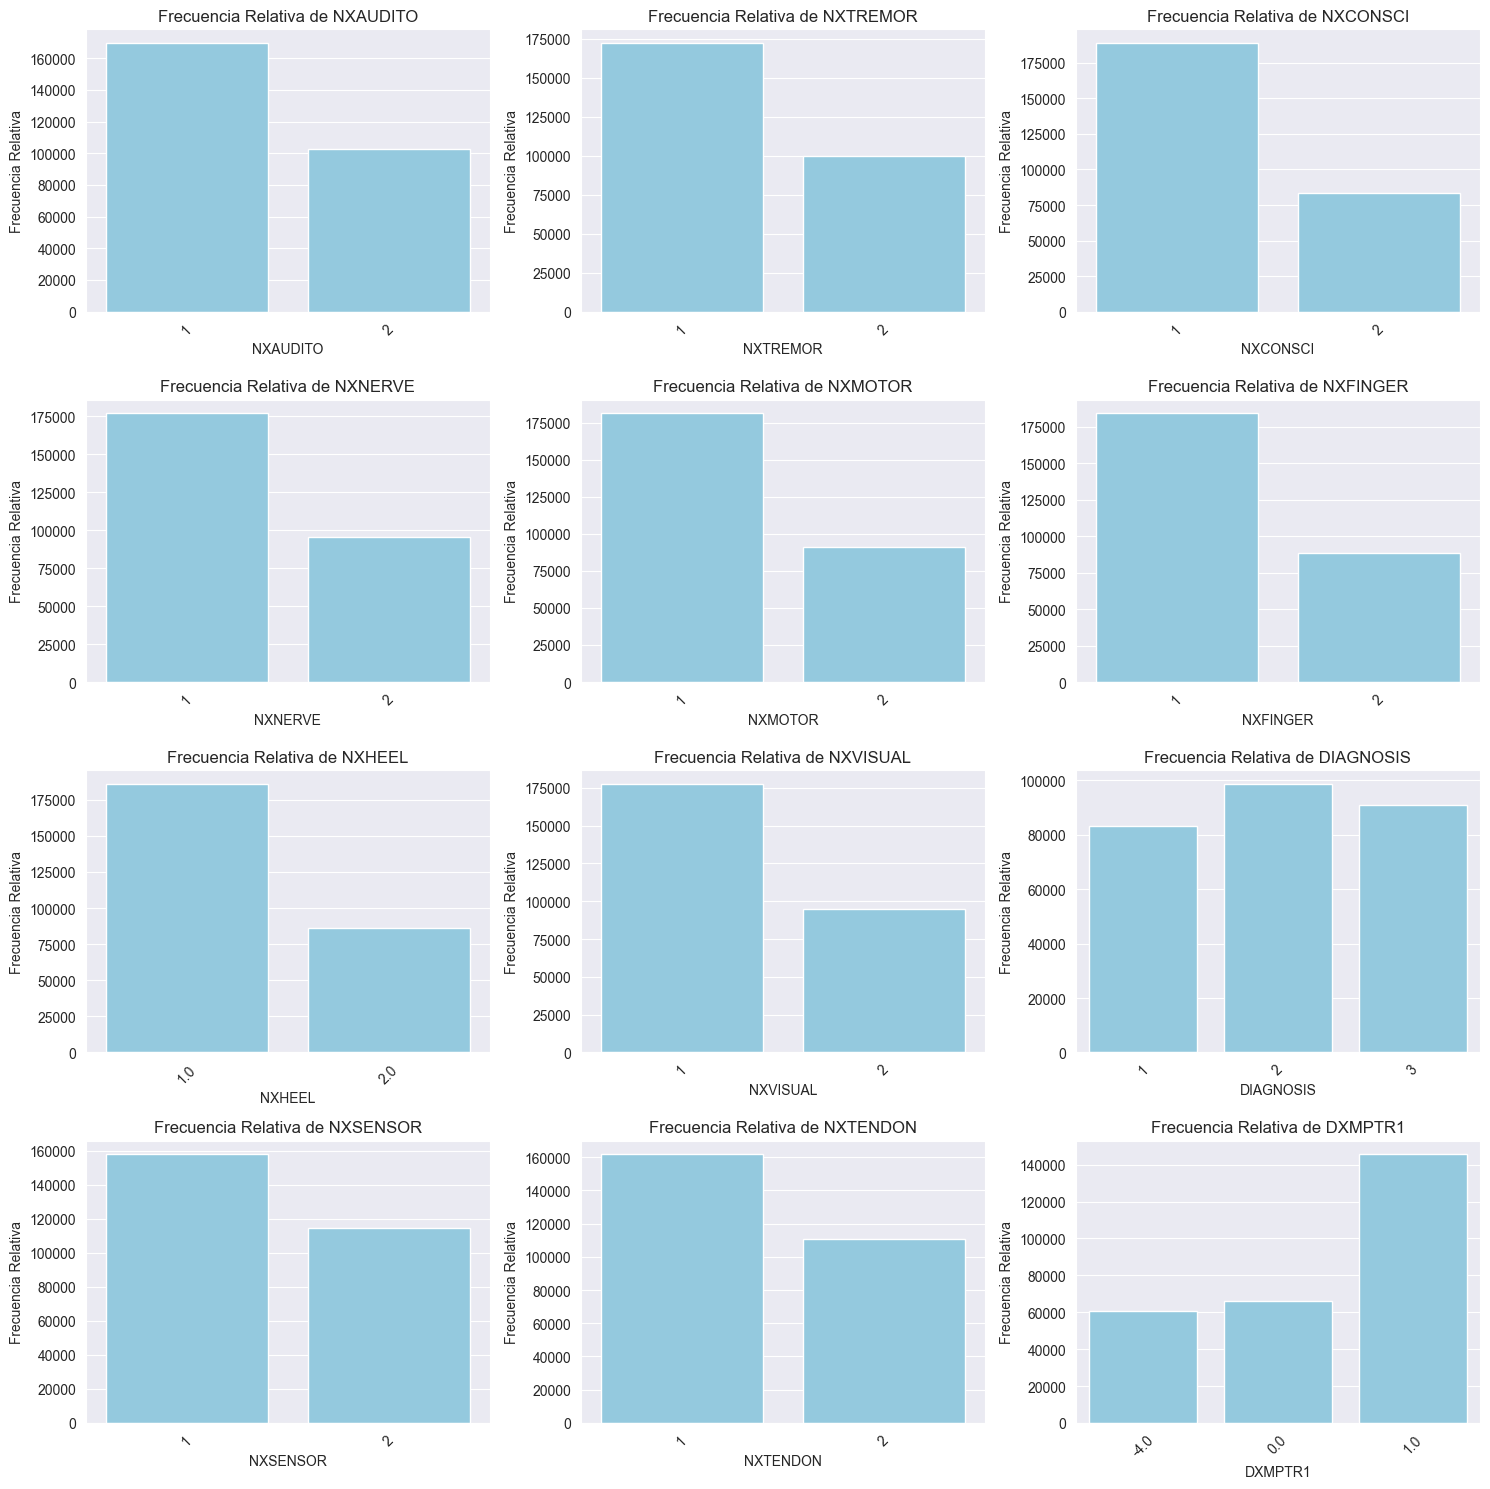

In [60]:
import matplotlib.pyplot as plt

# Variables a analizar
variables = ["NXAUDITO", "NXTREMOR", "NXCONSCI", "NXNERVE", "NXMOTOR", "NXFINGER", "NXHEEL", "NXVISUAL", "DIAGNOSIS", "NXSENSOR", "NXTENDON", "DXMPTR1"]

# Configuración del gráfico. Ajustar el grid para acomodar todas las variables
# Usamos 4 filas y 3 columnas para un total de 12 subplots, suficiente para 11 variables
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
# Aplanamos la matriz de ejes para iterar fácilmente
axes = axes.flatten()

# Crear un gráfico de barras para cada variable
for i, var in enumerate(variables):
    sns.countplot(x=var, data=df_datosjuntos_balanceado, ax=axes[i], color='skyblue') #Usamos seaborn para el countplot
    axes[i].set_title(f'Frecuencia Relativa de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia Relativa')
    axes[i].tick_params(axis='x', rotation=45) # Rotamos las etiquetas del eje x para mejor legibilidad

# Ocultar los subplots vacíos (si los hay)
for j in range(len(variables), len(axes)):
    axes[j].set_visible(False)

# Ajustar espacio entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()



In [61]:
# Variables clínicas
variables_clinicas = [
    'DXMPTR1', 'DXPARK', 'NXVISUAL', 'NXAUDITO', 'NXTREMOR', 'NXCONSCI',
    'NXNERVE', 'NXMOTOR', 'NXFINGER', 'NXHEEL', 'NXSENSOR', 'NXTENDON',
    'MH3HEAD', 'MH4CARD', 'MH5RESP', 'MH13ALLE', 'MH14ALCH', 'MH16SMOK',
    'MH17MALI', 'PLASMA_NFL', 'PLASMAPTAU181', 'PTGENDER', 'PTEDUCAT'
]

# Calcular frecuencia relativa de cada variable por DIAGNOSIS
for var in variables_clinicas:
    print(f"\n📊 Frecuencia relativa de {var} por DIAGNOSIS:")
    # Forzar el orden de las categorías (1 primero, 2 después para las primeras y 0 primero, 1 después para las últimas)
    print(df_datosjuntos_balanceado.groupby("DIAGNOSIS")[var].value_counts(normalize=True, sort=False).sort_index())


📊 Frecuencia relativa de DXMPTR1 por DIAGNOSIS:
DIAGNOSIS  DXMPTR1
1          -4.0       0.527460
            0.0       0.425295
            1.0       0.047246
2          -4.0       0.002037
            0.0       0.313176
            1.0       0.684788
3          -4.0       0.182937
            1.0       0.817063
Name: proportion, dtype: float64

📊 Frecuencia relativa de DXPARK por DIAGNOSIS:
DIAGNOSIS  DXPARK
1          -4.0      0.527460
            0.0      0.472119
            1.0      0.000422
2          -4.0      0.432794
            0.0      0.552838
            1.0      0.014368
3          -4.0      0.182761
            0.0      0.784857
            1.0      0.032383
Name: proportion, dtype: float64

📊 Frecuencia relativa de NXVISUAL por DIAGNOSIS:
DIAGNOSIS  NXVISUAL
1          1           0.824943
           2           0.175057
2          1           0.658280
           2           0.341720
3          1           0.487766
           2           0.512234
Name: proportion, dt

In [62]:
print(f"\n🔍 Total de observaciones en el DataFrame después del análisis: {df_datosjuntos_balanceado.shape[0]}")


🔍 Total de observaciones en el DataFrame después del análisis: 272553


Numero de RIDS (pacientes) que tienen DIAGNOSIS = 3 y NHEEL = 2 POST TRATAMIENTO DE DATOS

# **COMRPOBAMOS TODO (Ya que las transformaciones pueden haber desordenado los datos)**

[  42   84  101 ... 5219 4609 4708]
Total de RIDs únicos: 1166


,EXAMDATE (PTAU181),PLASMAPTAU181
583765,2010-09-22,11939
701192,2011-09-19,12936
7,2012-09-26,13563
512342,2013-09-09,15506


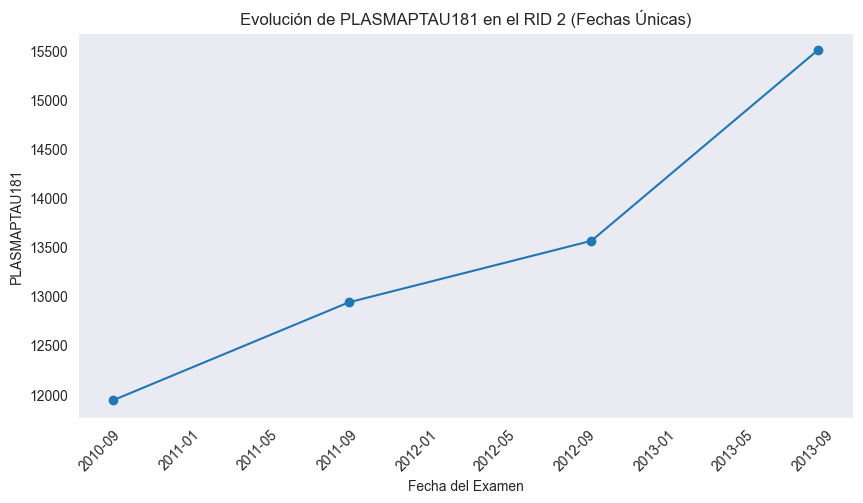

In [63]:
rids_unicos = df_datosjuntos_balanceado["RID"].unique()
print(rids_unicos)
print(f"Total de RIDs únicos: {len(rids_unicos)}")

df_rid_2 = df_datosjuntos_balanceado[df_datosjuntos_balanceado["RID"] == 2]

if df_rid_2.empty:
    print("❌ El RID 2 no está en el DataFrame.")
else:
    df_rid_2_unique = df_rid_2[["EXAMDATE (PTAU181)", "PLASMAPTAU181"]].drop_duplicates().sort_values(by="EXAMDATE (PTAU181)")
    display(df_rid_2_unique)  # Muestra las fechas únicas con los valores de PLASMAPTAU181

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_rid_2_unique["EXAMDATE (PTAU181)"], df_rid_2_unique["PLASMAPTAU181"], marker="o", linestyle="-")
plt.xlabel("Fecha del Examen")
plt.ylabel("PLASMAPTAU181")
plt.title("Evolución de PLASMAPTAU181 en el RID 2 (Fechas Únicas)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Nos fijamos como ha desorndeado las fechas en la tabla, no estan cronologicamente correctas

In [64]:
# Filtrar las filas correspondientes al RID 2
df_rid_2 = df_datosjuntos_balanceado[df_datosjuntos_balanceado["RID"] == 2]

# Mostrar las primeras 10 filas
print(df_rid_2.head(10))


        RID EXAMDATE(D)  DIAGNOSIS  DXMPTR1  DXPARK VISDATE(N)  NXVISUAL  \
583765    2  2013-09-23          1      0.0     0.0 2010-09-22         1   
512342    2  2012-10-04          2      1.0     0.0 2010-09-22         1   
701192    2  2015-10-20          1      0.0     0.0 2010-09-22         1   
7         2  2005-09-29          1     -4.0    -4.0 2005-08-17         2   
537       2  2006-03-06          1     -4.0    -4.0 2010-09-22         1   
534       2  2006-03-06          1     -4.0    -4.0 2010-09-22         1   
512205    2  2012-10-04          2      0.0     0.0 2005-08-17         2   
738859    2  2016-10-03          2      1.0     0.0 2005-08-17         1   
345944    2  2010-09-27          1      1.0     0.0 2010-09-22         1   
738926    2  2016-10-03          2      1.0     0.0 2005-08-17         2   

        NXAUDITO  NXTREMOR  NXCONSCI  ...  EXAMDATE(NFL)  RECNO  PLASMA_NFL  \
583765         1         1         1  ...     2013-09-09      1       353.0   
51234

In [65]:
# Asegurarse de que todas las columnas de fecha estén en el formato correcto
df_datosjuntos_balanceado['EXAMDATE(D)'] = pd.to_datetime(df_datosjuntos_balanceado['EXAMDATE(D)'])
df_datosjuntos_balanceado['VISDATE(N)'] = pd.to_datetime(df_datosjuntos_balanceado['VISDATE(N)'])
df_datosjuntos_balanceado['VISDATE(MEDH)'] = pd.to_datetime(df_datosjuntos_balanceado['VISDATE(MEDH)'])
df_datosjuntos_balanceado['EXAMDATE(NFL)'] = pd.to_datetime(df_datosjuntos_balanceado['EXAMDATE(NFL)'])
df_datosjuntos_balanceado['EXAMDATE (PTAU181)'] = pd.to_datetime(df_datosjuntos_balanceado['EXAMDATE (PTAU181)'])
df_datosjuntos_balanceado['VISDATE'] = pd.to_datetime(df_datosjuntos_balanceado['VISDATE'])

# Ordenar por todas las columnas de fecha relevantes
df_datosjuntos_balanceado = df_datosjuntos_balanceado.sort_values(
    by=['EXAMDATE(D)', 'VISDATE(N)', 'VISDATE(MEDH)', 'EXAMDATE(NFL)', 'EXAMDATE (PTAU181)', 'VISDATE'],
    ascending=True
)

# Mostrar las primeras 10 filas del DataFrame ordenado
print(df_datosjuntos_balanceado.head(10))


    RID EXAMDATE(D)  DIAGNOSIS  DXMPTR1  DXPARK VISDATE(N)  NXVISUAL  \
2     2  2005-09-29          1     -4.0    -4.0 2005-08-17         1   
5     2  2005-09-29          1     -4.0    -4.0 2005-08-17         1   
7     2  2005-09-29          1     -4.0    -4.0 2005-08-17         2   
9     2  2005-09-29          1     -4.0    -4.0 2005-08-17         1   
10    2  2005-09-29          1     -4.0    -4.0 2005-08-17         1   
13    2  2005-09-29          1     -4.0    -4.0 2005-08-17         1   
15    2  2005-09-29          1     -4.0    -4.0 2005-08-17         1   
16    2  2005-09-29          1     -4.0    -4.0 2005-08-17         2   
18    2  2005-09-29          1     -4.0    -4.0 2005-08-17         1   
19    2  2005-09-29          1     -4.0    -4.0 2005-08-17         1   

    NXAUDITO  NXTREMOR  NXCONSCI  ...  EXAMDATE(NFL)  RECNO  PLASMA_NFL  \
2          1         1         1  ...     2010-09-22      1       253.0   
5          1         1         1  ...     2010-09-22     

Comrpobamos con un RID RANDOM

In [66]:
import random

# Elegir un RID aleatorio
rid_aleatorio = random.choice(df_datosjuntos_balanceado['RID'].unique())

# Filtrar el DataFrame para obtener las filas del RID aleatorio
datos_rid = df_datosjuntos_balanceado[df_datosjuntos_balanceado['RID'] == rid_aleatorio]

# Mostrar los datos del RID aleatorio
print(f"Datos para el RID {rid_aleatorio}:")
print(datos_rid)


Datos para el RID 5224:
         RID EXAMDATE(D)  DIAGNOSIS  DXMPTR1  DXPARK VISDATE(N)  NXVISUAL  \
567684  5224  2013-06-12          3      1.0     0.0 2013-06-10         1   
575234  5224  2013-07-26          3      1.0     0.0 2013-06-10         2   
631678  5224  2014-02-06          3      1.0     0.0 2013-06-10         2   

        NXAUDITO  NXTREMOR  NXCONSCI  ...  EXAMDATE(NFL)  RECNO  PLASMA_NFL  \
567684         2         2         2  ...     2013-07-25      1       324.0   
575234         1         1         1  ...     2013-07-25      1       324.0   
631678         1         2         2  ...     2013-07-25      1       324.0   

        EXAMDATE (PTAU181)  VID  PLASMAPTAU181    VISDATE  PTGENDER  \
567684          2013-07-25    2          12189 2013-06-10       1.0   
575234          2013-07-25    2          12189 2013-06-10       1.0   
631678          2013-07-25    2          12189 2013-06-10       1.0   

            PTDOB  PTEDUCAT  
567684 1935-06-01      20.0  
57523

In [67]:
# Filtrar los datos para el RID 697
datos_rid_697 = df_datosjuntos_balanceado[df_datosjuntos_balanceado['RID'] == 697]

# Seleccionar las columnas relevantes
evolucion_plasma_nfl = datos_rid_697[['EXAMDATE(NFL)', 'PLASMA_NFL']]

# Eliminar duplicados basados en la columna de fecha
evolucion_plasma_nfl = evolucion_plasma_nfl.drop_duplicates(subset=['EXAMDATE(NFL)'])

# Ordenar los datos por fecha
evolucion_plasma_nfl = evolucion_plasma_nfl.sort_values(by='EXAMDATE(NFL)')

# Mostrar la evolución de PLASMA_NFL con fechas únicas
print(evolucion_plasma_nfl)


       EXAMDATE(NFL)  PLASMA_NFL
124662    2011-09-27      1297.0


In [68]:
# Comprobar si hay filas duplicadas en el DataFrame
duplicados = df_datosjuntos_balanceado[df_datosjuntos_balanceado.duplicated()]

# Mostrar si hay duplicados
if not duplicados.empty:
    print(f"Se encontraron {duplicados.shape[0]} filas duplicadas:")
    print(duplicados)
else:
    print("No hay filas duplicadas.")


No hay filas duplicadas.


Esta bien, concuerda con el EXCEL

In [69]:
# Lista de las variables para las que queremos ver las frecuencias relativas
variables12 = [
    'DIAGNOSIS', 'DXMPTR1', 'DXPARK', 'NXVISUAL', 'NXAUDITO', 'NXTREMOR', 'NXCONSCI',
    'NXNERVE', 'NXMOTOR', 'NXFINGER', 'NXHEEL', 'NXSENSOR', 'NXTENDON',
    'MH3HEAD', 'MH4CARD', 'MH5RESP', 'MH13ALLE', 'MH14ALCH', 'MH16SMOK',
    'MH17MALI', 'PLASMA_NFL', 'PLASMAPTAU181', 'PTGENDER', 'PTEDUCAT'
]

# Calcular frecuencias relativas para cada variable
frecuencias_relativas = df_datosjuntos_balanceado[variables12].apply(lambda x: x.value_counts(normalize=True) * 100)

# Mostrar las frecuencias relativas
print(frecuencias_relativas)


           DIAGNOSIS    DXMPTR1     DXPARK   NXVISUAL   NXAUDITO  NXTREMOR  \
-4.0             NaN  22.236776  37.828239        NaN        NaN       NaN   
 0.0             NaN  24.293257  60.559231        NaN        NaN       NaN   
 1.0       30.457562  53.469967   1.612530  65.220342  62.264587  63.28127   
 2.0       36.209104        NaN        NaN  34.779658  37.735413  36.71873   
 3.0       33.333333        NaN        NaN        NaN        NaN       NaN   
...              ...        ...        ...        ...        ...       ...   
 148037.0        NaN        NaN        NaN        NaN        NaN       NaN   
 156281.0        NaN        NaN        NaN        NaN        NaN       NaN   
 168531.0        NaN        NaN        NaN        NaN        NaN       NaN   
 238324.0        NaN        NaN        NaN        NaN        NaN       NaN   
 451398.0        NaN        NaN        NaN        NaN        NaN       NaN   

            NXCONSCI    NXNERVE    NXMOTOR   NXFINGER  ...    M

# **MODELOS**

## Normalizacion

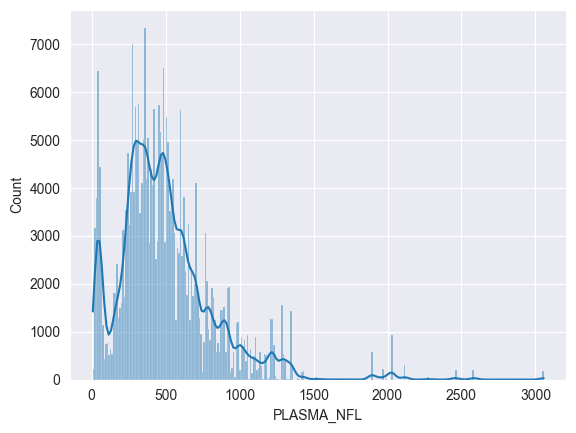

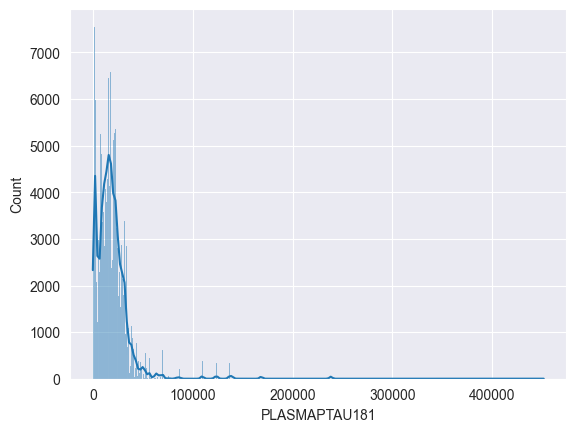

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'df' es tu DataFrame y 'biomarcador' es la columna que quieres analizar
sns.histplot(df_datosjuntos_balanceado['PLASMA_NFL'], kde=True)
plt.show()

sns.histplot(df_datosjuntos_balanceado['PLASMAPTAU181'], kde=True)
plt.show()

In [71]:
import pandas as pd

# Suponiendo que ya tienes el DataFrame df_datosjuntos_balanceado

# Convertir 'PTDOB' a formato datetime
df_datosjuntos_balanceado['PTDOB'] = pd.to_datetime(df_datosjuntos_balanceado['PTDOB'])

# Calcular la edad en 2025
df_datosjuntos_balanceado['edad_en_2025'] = 2025 - df_datosjuntos_balanceado['PTDOB'].dt.year

# Mostrar las primeras filas para ver el resultado
print(df_datosjuntos_balanceado[['RID', 'PTDOB', 'edad_en_2025']].head())

    RID      PTDOB  edad_en_2025
2     2 1931-04-01            94
5     2 1931-04-01            94
7     2 1931-04-01            94
9     2 1931-04-01            94
10    2 1931-04-01            94


In [72]:
import pandas as pd

# Convertir fechas a formato datetime
df_datosjuntos_balanceado['PTDOB'] = pd.to_datetime(df_datosjuntos_balanceado['PTDOB'])

# Lista de columnas de fechas en el dataset
columnas_fechas = ['EXAMDATE(D)', 'VISDATE(N)', 'VISDATE(MEDH)', 'EXAMDATE(NFL)', 'EXAMDATE (PTAU181)']

# Convertir cada fecha a formato datetime
for col in columnas_fechas:
    df_datosjuntos_balanceado[col] = pd.to_datetime(df_datosjuntos_balanceado[col])

# Calcular la edad en cada fecha de prueba
for col in columnas_fechas:
    df_datosjuntos_balanceado[f'edad_en_{col}'] = df_datosjuntos_balanceado[col].dt.year - df_datosjuntos_balanceado['PTDOB'].dt.year

In [73]:
print(df_datosjuntos_balanceado.columns)

Index(['RID', 'EXAMDATE(D)', 'DIAGNOSIS', 'DXMPTR1', 'DXPARK', 'VISDATE(N)',
       'NXVISUAL', 'NXAUDITO', 'NXTREMOR', 'NXCONSCI', 'NXNERVE', 'NXMOTOR',
       'NXFINGER', 'NXHEEL', 'NXSENSOR', 'NXTENDON', 'VISDATE(MEDH)',
       'MH3HEAD', 'MH4CARD', 'MH5RESP', 'MH13ALLE', 'MH14ALCH', 'MH16SMOK',
       'MH17MALI', 'EXAMDATE(NFL)', 'RECNO', 'PLASMA_NFL',
       'EXAMDATE (PTAU181)', 'VID', 'PLASMAPTAU181', 'VISDATE', 'PTGENDER',
       'PTDOB', 'PTEDUCAT', 'edad_en_2025', 'edad_en_EXAMDATE(D)',
       'edad_en_VISDATE(N)', 'edad_en_VISDATE(MEDH)', 'edad_en_EXAMDATE(NFL)',
       'edad_en_EXAMDATE (PTAU181)'],
      dtype='object')


In [74]:
# Calcular la media y desviación estándar de las columnas seleccionadas
columnas_edad = ['edad_en_EXAMDATE(D)', 'edad_en_VISDATE(N)', 'edad_en_VISDATE(MEDH)', 
                 'edad_en_EXAMDATE(NFL)', 'edad_en_EXAMDATE (PTAU181)', 'edad_en_2025']

# Media de las columnas seleccionadas
media_edades = df_datosjuntos_balanceado[columnas_edad].mean()

# Desviación estándar de las columnas seleccionadas
desviacion_estandar_edades = df_datosjuntos_balanceado[columnas_edad].std()

# Mostrar resultados
print("Media de las edades:")
print(media_edades)

print("\nDesviación estándar de las edades:")
print(desviacion_estandar_edades)


Media de las edades:
edad_en_EXAMDATE(D)           77.903300
edad_en_VISDATE(N)            75.370343
edad_en_VISDATE(MEDH)         76.422362
edad_en_EXAMDATE(NFL)         79.070676
edad_en_EXAMDATE (PTAU181)    79.066864
edad_en_2025                  91.820684
dtype: float64

Desviación estándar de las edades:
edad_en_EXAMDATE(D)           7.334120
edad_en_VISDATE(N)            7.006543
edad_en_VISDATE(MEDH)         7.162751
edad_en_EXAMDATE(NFL)         7.108292
edad_en_EXAMDATE (PTAU181)    7.106028
edad_en_2025                  7.040877
dtype: float64


In [75]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos solo las variables a normalizar
cols_to_scale = ['PTEDUCAT', 'PLASMA_NFL', 'PLASMAPTAU181','edad_en_EXAMDATE(D)','edad_en_VISDATE(N)', 'edad_en_VISDATE(MEDH)', 'edad_en_EXAMDATE(NFL)', 'edad_en_EXAMDATE (PTAU181)' ]  # Añade más si es necesario

# Creamos el normalizador
scaler = MinMaxScaler()

# Aplicamos la normalización
df_datosjuntos_balanceado[cols_to_scale] = scaler.fit_transform(df_datosjuntos_balanceado[cols_to_scale])

## Pasar las variables de Fecha a Numeros para poder utilizarlas en los modelos

In [76]:
print(df_datosjuntos_balanceado.head(10))

    RID EXAMDATE(D)  DIAGNOSIS  DXMPTR1  DXPARK VISDATE(N)  NXVISUAL  \
2     2  2005-09-29          1     -4.0    -4.0 2005-08-17         1   
5     2  2005-09-29          1     -4.0    -4.0 2005-08-17         1   
7     2  2005-09-29          1     -4.0    -4.0 2005-08-17         2   
9     2  2005-09-29          1     -4.0    -4.0 2005-08-17         1   
10    2  2005-09-29          1     -4.0    -4.0 2005-08-17         1   
13    2  2005-09-29          1     -4.0    -4.0 2005-08-17         1   
15    2  2005-09-29          1     -4.0    -4.0 2005-08-17         1   
16    2  2005-09-29          1     -4.0    -4.0 2005-08-17         2   
18    2  2005-09-29          1     -4.0    -4.0 2005-08-17         1   
19    2  2005-09-29          1     -4.0    -4.0 2005-08-17         1   

    NXAUDITO  NXTREMOR  NXCONSCI  ...    VISDATE  PTGENDER      PTDOB  \
2          1         1         1  ... 2011-09-19       1.0 1931-04-01   
5          1         1         1  ... 2011-09-19       1.0 19

In [77]:
print(df_datosjuntos_balanceado.columns)

Index(['RID', 'EXAMDATE(D)', 'DIAGNOSIS', 'DXMPTR1', 'DXPARK', 'VISDATE(N)',
       'NXVISUAL', 'NXAUDITO', 'NXTREMOR', 'NXCONSCI', 'NXNERVE', 'NXMOTOR',
       'NXFINGER', 'NXHEEL', 'NXSENSOR', 'NXTENDON', 'VISDATE(MEDH)',
       'MH3HEAD', 'MH4CARD', 'MH5RESP', 'MH13ALLE', 'MH14ALCH', 'MH16SMOK',
       'MH17MALI', 'EXAMDATE(NFL)', 'RECNO', 'PLASMA_NFL',
       'EXAMDATE (PTAU181)', 'VID', 'PLASMAPTAU181', 'VISDATE', 'PTGENDER',
       'PTDOB', 'PTEDUCAT', 'edad_en_2025', 'edad_en_EXAMDATE(D)',
       'edad_en_VISDATE(N)', 'edad_en_VISDATE(MEDH)', 'edad_en_EXAMDATE(NFL)',
       'edad_en_EXAMDATE (PTAU181)'],
      dtype='object')


##**Matriz de Correlacion**

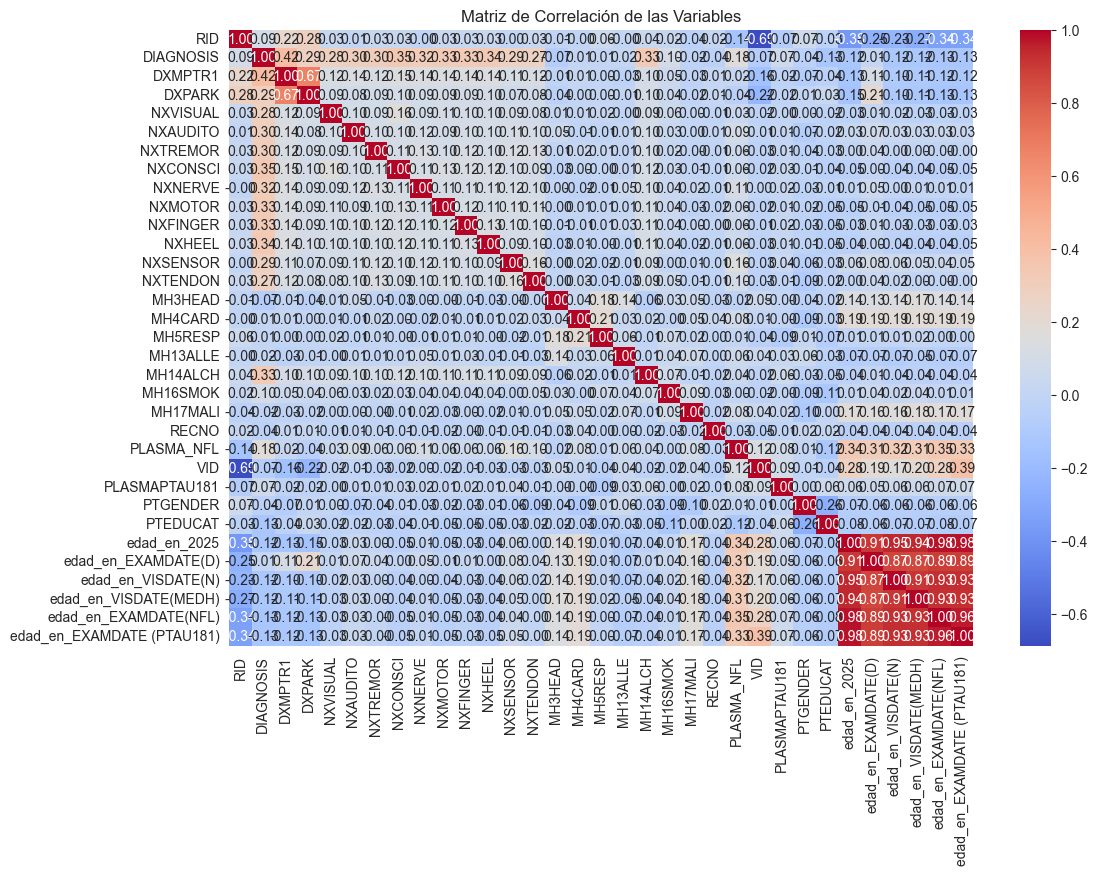

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las variables numéricas
df_numeric = df_datosjuntos_balanceado.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Graficar un heatmap de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación de las Variables")
plt.show()


## **Regresion Logistica**

In [79]:
# Mostrar las columnas de tu DataFrame
print(df_datosjuntos_balanceado.columns)

Index(['RID', 'EXAMDATE(D)', 'DIAGNOSIS', 'DXMPTR1', 'DXPARK', 'VISDATE(N)',
       'NXVISUAL', 'NXAUDITO', 'NXTREMOR', 'NXCONSCI', 'NXNERVE', 'NXMOTOR',
       'NXFINGER', 'NXHEEL', 'NXSENSOR', 'NXTENDON', 'VISDATE(MEDH)',
       'MH3HEAD', 'MH4CARD', 'MH5RESP', 'MH13ALLE', 'MH14ALCH', 'MH16SMOK',
       'MH17MALI', 'EXAMDATE(NFL)', 'RECNO', 'PLASMA_NFL',
       'EXAMDATE (PTAU181)', 'VID', 'PLASMAPTAU181', 'VISDATE', 'PTGENDER',
       'PTDOB', 'PTEDUCAT', 'edad_en_2025', 'edad_en_EXAMDATE(D)',
       'edad_en_VISDATE(N)', 'edad_en_VISDATE(MEDH)', 'edad_en_EXAMDATE(NFL)',
       'edad_en_EXAMDATE (PTAU181)'],
      dtype='object')


In [80]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Asumiendo que df_datosjuntos_balanceado es el DataFrame

# 3. Seleccionar las variables que quiero usar en el modelo
variables_relevantes = [
    'DXMPTR1', 'DXPARK', 'NXVISUAL', 'NXAUDITO', 'NXTREMOR', 'NXCONSCI', 'NXNERVE', 'NXMOTOR', 'NXFINGER', 'NXHEEL',
    'NXSENSOR', 'NXTENDON', 'MH3HEAD', 'MH4CARD', 'MH5RESP', 'MH13ALLE', 'MH14ALCH', 'MH16SMOK', 'MH17MALI',
    'PLASMA_NFL', 'PLASMAPTAU181', 'PTGENDER', 'PTEDUCAT', 'edad_en_EXAMDATE(D)', 'edad_en_VISDATE(N)', 'edad_en_VISDATE(MEDH)',
    'edad_en_EXAMDATE(NFL)', 'edad_en_EXAMDATE (PTAU181)'
]

X = df_datosjuntos_balanceado[variables_relevantes]
y = df_datosjuntos_balanceado['DIAGNOSIS']

# 4. Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Crear y entrenar el modelo sin regularización
model_rl = LogisticRegression(penalty='l2', solver='saga', max_iter=1000, multi_class='multinomial')
model_rl.fit(X_train, y_train)

# 6. Hacer predicciones y evaluar el modelo
y_pred = model_rl.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


C:\Users\nico0\PycharmProjects\TFG\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8112674506062997

Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.92      0.89     16603
           2       0.79      0.74      0.76     19738
           3       0.78      0.79      0.79     18170

    accuracy                           0.81     54511
   macro avg       0.81      0.82      0.81     54511
weighted avg       0.81      0.81      0.81     54511



In [81]:
import time
import numpy as np
from sklearn.metrics import accuracy_score

# 1. Medir el tiempo de entrenamiento
start_training_time = time.time()

# Entrenar el modelo
model_rl.fit(X_train, y_train)

# Tiempo total de entrenamiento
training_time = time.time() - start_training_time
print(f"Training Time: {training_time:.4f} segundos")

# 2. Medir el tiempo de predicción
start_prediction_time = time.time()

# Realizar las predicciones
y_test_pred_rl = model_rl.predict(X_test)

# Tiempo total de predicción
prediction_time = time.time() - start_prediction_time
print(f"Prediction Time: {prediction_time:.4f} segundos")

# 3. Calcular el throughput (predicciones por segundo)
num_predictions = X_test.shape[0]  # Número de predicciones (tamaño de X_test)
throughput = num_predictions / prediction_time  # Predicciones por segundo
print(f"Throughput: {throughput:.2f} predicciones por segundo")


C:\Users\nico0\PycharmProjects\TFG\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Time: 5.0606 segundos
Prediction Time: 0.0131 segundos
Throughput: 4156861.67 predicciones por segundo


    DXMPTR1    DXPARK  NXVISUAL  NXAUDITO  NXTREMOR  NXCONSCI   NXNERVE  \
0 -1.863651  1.677929 -0.645935 -0.846978 -0.806678 -0.965666 -0.945085   
1  1.410567 -1.110274  0.019534  0.090837  0.065178  0.090712  0.138799   
2  0.453084 -0.567655  0.626401  0.756140  0.741500  0.874954  0.806285   

    NXMOTOR  NXFINGER    NXHEEL  ...  PLASMA_NFL  PLASMAPTAU181  PTGENDER  \
0 -0.864670 -0.958653 -1.018310  ...   -2.930825      -2.507574  0.172946   
1  0.063152  0.068029  0.113539  ...    0.022758      -2.953820 -0.288514   
2  0.801518  0.890624  0.904771  ...    2.908067       5.461394  0.115568   

   PTEDUCAT  edad_en_EXAMDATE(D)  edad_en_VISDATE(N)  edad_en_VISDATE(MEDH)  \
0  1.371318            -2.683556            0.225375              -0.601600   
1 -0.608095            -3.772321            2.382817               1.413393   
2 -0.763223             6.455877           -2.608192              -0.811794   

   edad_en_EXAMDATE(NFL)  edad_en_EXAMDATE (PTAU181)  Clase  
0          

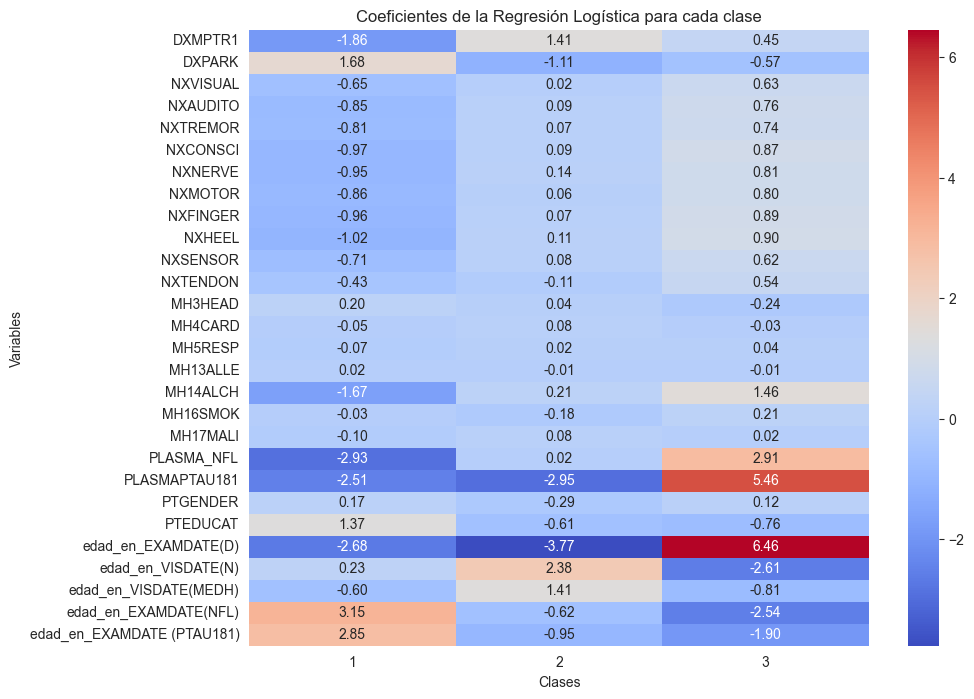

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los coeficientes de la regresión logística
coef_df = pd.DataFrame(model_rl.coef_, columns=X.columns)
coef_df['Clase'] = model_rl.classes_

# Mostrar los coeficientes
print(coef_df)

# Si queremos ver los coeficientes para clases específicas, por ejemplo para la clase 3 (Alzheimer)
coef_clase_3 = coef_df[coef_df['Clase'] == 3].drop('Clase', axis=1).T
print("\nCoeficientes para la clase 3 (Alzheimer):\n", coef_clase_3)

# Para ver la importancia de las variables en todas las clases, se puede hacer un gráfico de barras
plt.figure(figsize=(10, 8))
sns.heatmap(coef_df.set_index('Clase').T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Coeficientes de la Regresión Logística para cada clase")
plt.ylabel('Variables')
plt.xlabel('Clases')
plt.show()


##  **Comprobar el sobreajuste (RL)**

In [83]:
# Evaluación en los datos de entrenamiento
y_train_pred = model_rl.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report for Train Data:\n", classification_report(y_train, y_train_pred))

# Evaluación en los datos de prueba
y_test_pred = model_rl.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report for Test Data:\n", classification_report(y_test, y_test_pred))


Train Accuracy: 0.8108529549352878

Classification Report for Train Data:
               precision    recall  f1-score   support

           1       0.87      0.92      0.89     66410
           2       0.79      0.74      0.76     78951
           3       0.78      0.79      0.79     72681

    accuracy                           0.81    218042
   macro avg       0.81      0.82      0.81    218042
weighted avg       0.81      0.81      0.81    218042

Test Accuracy: 0.811212415842674

Classification Report for Test Data:
               precision    recall  f1-score   support

           1       0.87      0.92      0.89     16603
           2       0.79      0.74      0.76     19738
           3       0.78      0.79      0.79     18170

    accuracy                           0.81     54511
   macro avg       0.81      0.82      0.81     54511
weighted avg       0.81      0.81      0.81     54511



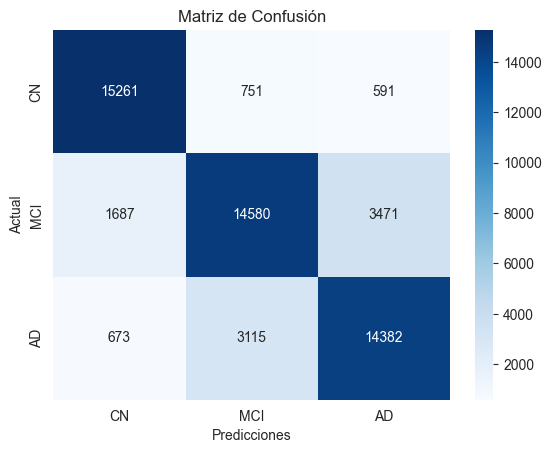

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['CN', 'MCI', 'AD'], yticklabels=['CN', 'MCI', 'AD'])
plt.xlabel('Predicciones')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

C:\Users\nico0\PycharmProjects\TFG\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\nico0\PycharmProjects\TFG\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\nico0\PycharmProjects\TFG\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\nico0\PycharmProjects\TFG\.venv\Lib\site-packages\sklearn\linear_model\_logisti

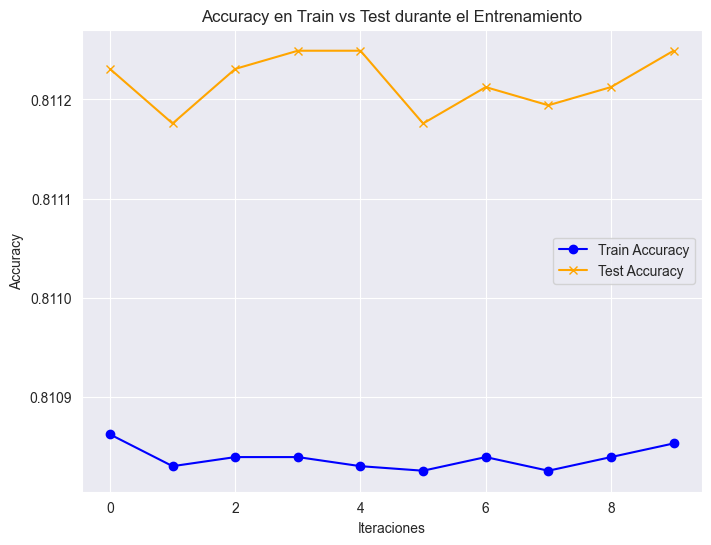

In [85]:
# Inicializamos las listas para almacenar las accuracies de entrenamiento y prueba
train_accuracies = []
test_accuracies = []
#Evaluación para cada iteración del entrenamiento
for i in range(1, 11):  #Entrenamos el modelo 10 veces (puedes ajustar el número de iteraciones)
    model_rl.fit(X_train, y_train)

    # Evaluación en los datos de entrenamiento
    y_train_pred = model_rl.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Evaluación en los datos de prueba
    y_test_pred = model_rl.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Almacenamos las accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

import matplotlib.pyplot as plt

# Graficar las accuracies de entrenamiento y prueba
plt.figure(figsize=(8, 6))
plt.plot(train_accuracies, label='Train Accuracy', color='blue', marker='o')
plt.plot(test_accuracies, label='Test Accuracy', color='orange', marker='x')

plt.title('Accuracy en Train vs Test durante el Entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

El modelo parece estar funcionando bien y generalizando correctamente. El hecho de que la precisión en el conjunto de prueba sea similar a la de la validación cruzada sugiere que el modelo no está sobreajustado, sino que ha aprendido patrones generales en los datos que también se aplican bien en datos nuevos.

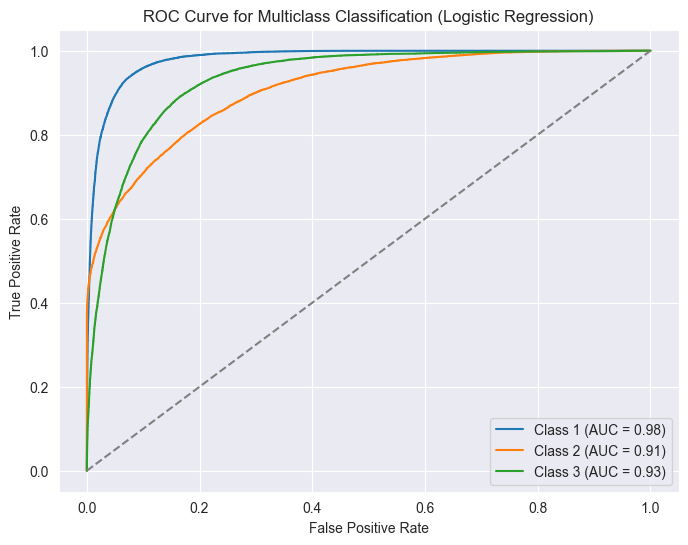

Macro AUC: 0.9405
Weighted AUC: 0.9384


In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarizar las etiquetas en formato One-Vs-Rest (OvR)
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

# Obtener las probabilidades de predicción
y_test_proba = model_rl.predict_proba(X_test)

# Inicializar la figura
plt.figure(figsize=(8, 6))

# Calcular y graficar la curva ROC para cada clase
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

# Línea base (clasificador aleatorio)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Etiquetas y título
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiclass Classification (Logistic Regression)")
plt.legend()
plt.show()

# Calcular AUC promedio (macro y weighted)
macro_auc = roc_auc_score(y_test_bin, y_test_proba, average="macro")
weighted_auc = roc_auc_score(y_test_bin, y_test_proba, average="weighted")

print(f"Macro AUC: {macro_auc:.4f}")
print(f"Weighted AUC: {weighted_auc:.4f}")


## **RANDOM FOREST**

## **RF**

In [87]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# 1. Seleccionar las variables que queremos usar en el modelo
variables_relevantes = [
    'DXMPTR1', 'DXPARK', 'NXVISUAL', 'NXAUDITO', 'NXTREMOR', 'NXCONSCI', 'NXNERVE', 'NXMOTOR', 'NXFINGER', 'NXHEEL',
    'NXSENSOR', 'NXTENDON', 'MH3HEAD', 'MH4CARD', 'MH5RESP', 'MH13ALLE', 'MH14ALCH', 'MH16SMOK', 'MH17MALI',
    'PLASMA_NFL', 'PLASMAPTAU181', 'PTGENDER', 'PTEDUCAT', 'edad_en_EXAMDATE(D)', 'edad_en_VISDATE(N)', 'edad_en_VISDATE(MEDH)',
    'edad_en_EXAMDATE(NFL)', 'edad_en_EXAMDATE (PTAU181)'
]

X = df_datosjuntos_balanceado[variables_relevantes]
y = df_datosjuntos_balanceado['DIAGNOSIS']

# 2. Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model_rf = RandomForestClassifier(
    n_estimators=100,  # Reducimos el número de árboles
    max_depth=10,  # Reducimos la profundidad
    min_samples_split=20,  # Mayor cantidad de muestras requeridas para dividir un nodo
    min_samples_leaf=10,  # Mayor número mínimo de muestras por hoja
    max_features= 'sqrt',  # Menos características consideradas por división
    random_state=42
)


model_rf.fit(X_train, y_train)

# 4. Hacer predicciones y evaluar el modelo
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)

# 5. Evaluación del sobreajuste
train_accuracy = accuracy_score(y_train, y_train_pred_rf)
test_accuracy = accuracy_score(y_test, y_test_pred_rf)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# 6. Validación cruzada
cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5)
print(f"\nCross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred_rf))



Train Accuracy: 0.8786
Test Accuracy: 0.8737

Cross-Validation Accuracy: 0.8759 ± 0.0015

Classification Report (Test Data):
               precision    recall  f1-score   support

           1       0.90      0.92      0.91     16603
           2       0.87      0.79      0.83     19738
           3       0.85      0.92      0.89     18170

    accuracy                           0.87     54511
   macro avg       0.87      0.88      0.87     54511
weighted avg       0.87      0.87      0.87     54511



In [88]:
import time
import numpy as np
from sklearn.metrics import accuracy_score

# 1. Medir el tiempo de entrenamiento
start_training_time = time.time()

# Entrenar el modelo
model_rf.fit(X_train, y_train)

# Tiempo total de entrenamiento
training_time = time.time() - start_training_time
print(f"Training Time: {training_time:.4f} segundos")

# 2. Medir el tiempo de predicción
start_prediction_time = time.time()

# Realizar las predicciones
y_test_pred_rf = model_rf.predict(X_test)

# Tiempo total de predicción
prediction_time = time.time() - start_prediction_time
print(f"Prediction Time: {prediction_time:.4f} segundos")

# 3. Calcular el throughput (predicciones por segundo)
num_predictions = X_test.shape[0]  # Número de predicciones (tamaño de X_test)
throughput = num_predictions / prediction_time  # Predicciones por segundo
print(f"Throughput: {throughput:.2f} predicciones por segundo")

Training Time: 21.4117 segundos
Prediction Time: 0.7441 segundos
Throughput: 73254.10 predicciones por segundo


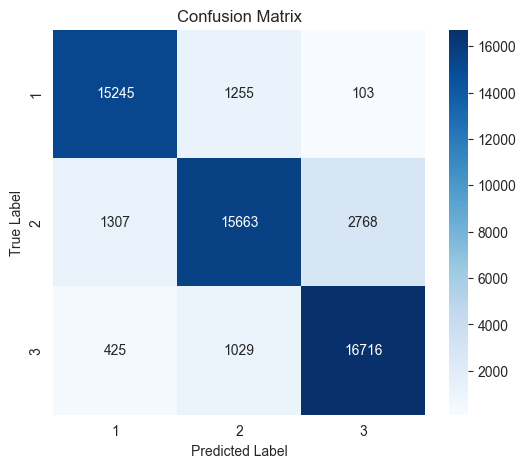

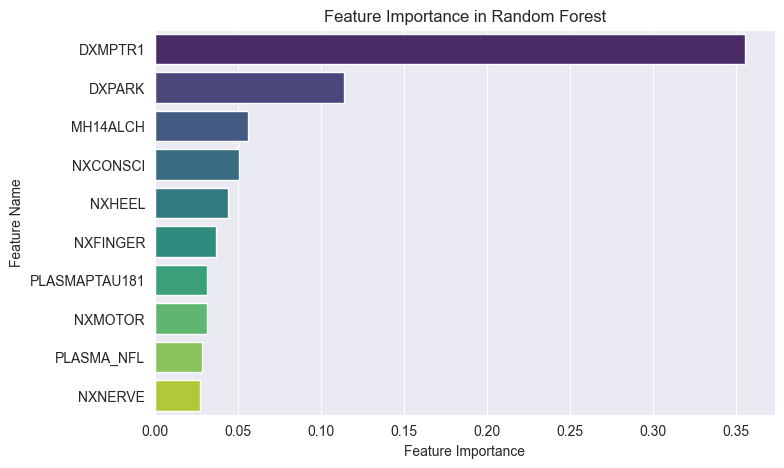

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 1. Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# 3. Importancia de Características
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importances[:10], hue="Feature", palette="viridis", legend=False)  # Top 10
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Random Forest")
plt.show()


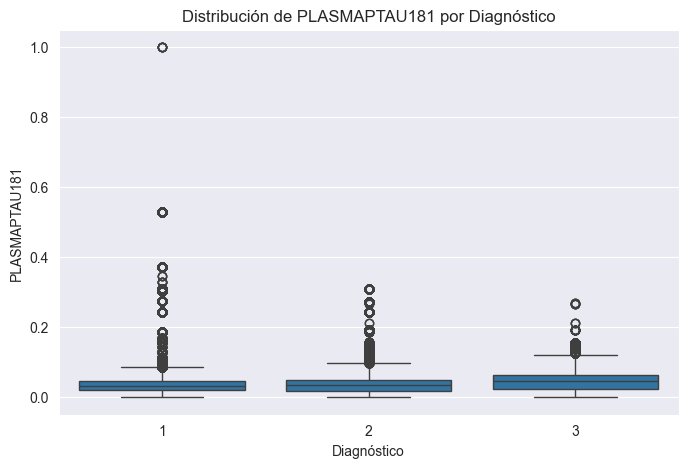

In [90]:
# Boxplot de PLASMAPTAU181 en función de la variable objetivo
plt.figure(figsize=(8, 5))
sns.boxplot(x='DIAGNOSIS', y='PLASMAPTAU181', data=df_datosjuntos_balanceado)
plt.title('Distribución de PLASMAPTAU181 por Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('PLASMAPTAU181')
plt.show()

In [91]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Mostrar la importancia específica de PLASMAPTAU181
print(feature_importances[feature_importances['Feature'] == 'PLASMAPTAU181'])

          Feature  Importance
20  PLASMAPTAU181    0.031732


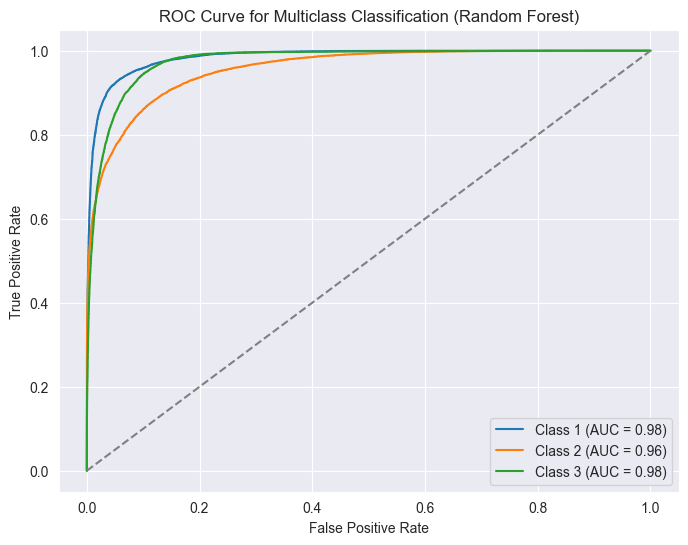

Macro AUC: 0.9720
Weighted AUC: 0.9712


In [92]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Binarizar las etiquetas para one-vs-rest
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_proba = model_rf.predict_proba(X_test)

# Graficar la curva ROC por cada clase
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(np.unique(y)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiclass Classification (Random Forest)")
plt.legend()
plt.show()

# Calcular AUC macro y weighted
macro_auc = roc_auc_score(y_test_bin, y_proba, average="macro")
weighted_auc = roc_auc_score(y_test_bin, y_proba, average="weighted")
print(f"Macro AUC: {macro_auc:.4f}")
print(f"Weighted AUC: {weighted_auc:.4f}")


## **ANN**  (FNN/MLP)

In [93]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Suponiendo que df_datosjuntos_balanceado es el DataFrame con los datos
features = [
    'DXMPTR1', 'DXPARK', 'NXVISUAL', 'NXAUDITO', 'NXTREMOR', 'NXCONSCI', 'NXNERVE', 'NXMOTOR', 'NXFINGER', 'NXHEEL',
    'NXSENSOR', 'NXTENDON', 'MH3HEAD', 'MH4CARD', 'MH5RESP', 'MH13ALLE', 'MH14ALCH', 'MH16SMOK', 'MH17MALI',
    'PLASMA_NFL', 'PLASMAPTAU181', 'PTGENDER', 'PTEDUCAT','edad_en_EXAMDATE(D)', 'edad_en_VISDATE(N)', 'edad_en_VISDATE(MEDH)',
    'edad_en_EXAMDATE(NFL)', 'edad_en_EXAMDATE (PTAU181)', 'edad_en_2025'
]
target = 'DIAGNOSIS'

# Separar variables de edad
age_features = [
    'edad_en_EXAMDATE(D)', 'edad_en_VISDATE(N)', 'edad_en_VISDATE(MEDH)',
    'edad_en_EXAMDATE(NFL)', 'edad_en_EXAMDATE (PTAU181)', 'edad_en_2025'
]

# Copia de los datos
X_transformed = df_datosjuntos_balanceado[features].copy()

# Normalizar solo las columnas de edad
scaler = MinMaxScaler()
X_transformed[age_features] = scaler.fit_transform(X_transformed[age_features])

# Convertir a numpy array
X_scaled = X_transformed.values

# Extraer y (etiqueta)
y = df_datosjuntos_balanceado[target].values

# Convertir y a one-hot encoding
y_one_hot = to_categorical(y - 1, num_classes=3)  # Ajustar etiquetas de 1-3 a 0-2

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42, stratify=y)

# Definir la ANN (MLP)
model = Sequential([
    tf.keras.layers.Input(shape=(len(features),)),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Callback para EarlyStopping y ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_ann_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Entrenar el modelo
epochs = 100
batch_size = 540
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, model_checkpoint])

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Evaluación adicional con clasificación
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Mostrar el reporte de clasificación
print(classification_report(y_true_classes, y_pred_classes))



Epoch 1/100
395/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6565 - loss: 2.4085

404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6587 - loss: 2.3864 - val_accuracy: 0.8247 - val_loss: 0.6302
Epoch 2/100
390/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8209 - loss: 0.5993

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8210 - loss: 0.5981 - val_accuracy: 0.8374 - val_loss: 0.4951
Epoch 3/100
396/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8296 - loss: 0.5053

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8296 - loss: 0.5052 - val_accuracy: 0.8404 - val_loss: 0.4678
Epoch 4/100
396/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8301 - loss: 0.4876

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8301 - loss: 0.4875 - val_accuracy: 0.8394 - val_loss: 0.4589
Epoch 5/100
395/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8313 - loss: 0.4761

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8314 - loss: 0.4760 - val_accuracy: 0.8389 - val_loss: 0.4531
Epoch 6/100
401/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8337 - loss: 0.4655

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8337 - loss: 0.4655 - val_accuracy: 0.8443 - val_loss: 0.4403
Epoch 7/100
394/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8343 - loss: 0.4611

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8343 - loss: 0.4610 - val_accuracy: 0.8446 - val_loss: 0.4376
Epoch 8/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8347 - loss: 0.4562 - val_accuracy: 0.8414 - val_loss: 0.4412
Epoch 9/100
393/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8376 - loss: 0.4506

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8376 - loss: 0.4506 - val_accuracy: 0.8476 - val_loss: 0.4275
Epoch 10/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8381 - loss: 0.4474 - val_accuracy: 0.8443 - val_loss: 0.4330
Epoch 11/100
399/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8385 - loss: 0.4441

404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8385 - loss: 0.4441 - val_accuracy: 0.8475 - val_loss: 0.4250
Epoch 12/100
398/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8424 - loss: 0.4392

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8423 - loss: 0.4392 - val_accuracy: 0.8480 - val_loss: 0.4233
Epoch 13/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8412 - loss: 0.4390 - val_accuracy: 0.8400 - val_loss: 0.4396
Epoch 14/100
403/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8409 - loss: 0.4389

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8409 - loss: 0.4389 - val_accuracy: 0.8480 - val_loss: 0.4200
Epoch 15/100
401/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8429 - loss: 0.4350

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8429 - loss: 0.4350 - val_accuracy: 0.8530 - val_loss: 0.4132
Epoch 16/100
396/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8435 - loss: 0.4329

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8435 - loss: 0.4329 - val_accuracy: 0.8540 - val_loss: 0.4128
Epoch 17/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8442 - loss: 0.4329 - val_accuracy: 0.8513 - val_loss: 0.4146
Epoch 18/100
399/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8458 - loss: 0.4287

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8458 - loss: 0.4287 - val_accuracy: 0.8551 - val_loss: 0.4078
Epoch 19/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8458 - loss: 0.4281 - val_accuracy: 0.8507 - val_loss: 0.4171
Epoch 20/100
399/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8461 - loss: 0.4277

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8462 - loss: 0.4277 - val_accuracy: 0.8558 - val_loss: 0.4062
Epoch 21/100
397/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8466 - loss: 0.4243

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8466 - loss: 0.4243 - val_accuracy: 0.8572 - val_loss: 0.4031
Epoch 22/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8470 - loss: 0.4241 - val_accuracy: 0.8543 - val_loss: 0.4074
Epoch 23/100
398/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8501 - loss: 0.4200

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8501 - loss: 0.4200 - val_accuracy: 0.8593 - val_loss: 0.4003
Epoch 24/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8505 - loss: 0.4197 - val_accuracy: 0.8585 - val_loss: 0.4026
Epoch 25/100
398/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8508 - loss: 0.4165

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8508 - loss: 0.4165 - val_accuracy: 0.8590 - val_loss: 0.3990
Epoch 26/100
391/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8495 - loss: 0.4183

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8495 - loss: 0.4182 - val_accuracy: 0.8603 - val_loss: 0.3965
Epoch 27/100
396/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8531 - loss: 0.4134

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8531 - loss: 0.4134 - val_accuracy: 0.8619 - val_loss: 0.3944
Epoch 28/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8537 - loss: 0.4121 - val_accuracy: 0.8603 - val_loss: 0.3963
Epoch 29/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8540 - loss: 0.4106 - val_accuracy: 0.8575 - val_loss: 0.4014
Epoch 30/100
398/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8544 - loss: 0.4104

404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8544 - loss: 0.4104 - val_accuracy: 0.8644 - val_loss: 0.3891
Epoch 31/100
395/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8547 - loss: 0.4100

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8548 - loss: 0.4100 - val_accuracy: 0.8653 - val_loss: 0.3862
Epoch 32/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8557 - loss: 0.4083 - val_accuracy: 0.8597 - val_loss: 0.3957
Epoch 33/100
402/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8556 - loss: 0.4080

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8556 - loss: 0.4080 - val_accuracy: 0.8679 - val_loss: 0.3838
Epoch 34/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8574 - loss: 0.4052 - val_accuracy: 0.8650 - val_loss: 0.3872
Epoch 35/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8580 - loss: 0.4043 - val_accuracy: 0.8600 - val_loss: 0.3946
Epoch 36/100
398/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8591 - loss: 0.4025

404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8591 - loss: 0.4025 - val_accuracy: 0.8678 - val_loss: 0.3835
Epoch 37/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8597 - loss: 0.4012 - val_accuracy: 0.8645 - val_loss: 0.3876
Epoch 38/100
396/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8617 - loss: 0.3986

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8617 - loss: 0.3986 - val_accuracy: 0.8678 - val_loss: 0.3807
Epoch 39/100
401/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8589 - loss: 0.4004

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8589 - loss: 0.4003 - val_accuracy: 0.8703 - val_loss: 0.3776
Epoch 40/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8605 - loss: 0.3980 - val_accuracy: 0.8660 - val_loss: 0.3854
Epoch 41/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8622 - loss: 0.3968 - val_accuracy: 0.8664 - val_loss: 0.3849
Epoch 42/100
400/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8614 - loss: 0.3958

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8614 - loss: 0.3958 - val_accuracy: 0.8720 - val_loss: 0.3745
Epoch 43/100
402/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8623 - loss: 0.3950

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8623 - loss: 0.3950 - val_accuracy: 0.8740 - val_loss: 0.3742
Epoch 44/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8643 - loss: 0.3931 - val_accuracy: 0.8679 - val_loss: 0.3813
Epoch 45/100
400/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8630 - loss: 0.3929

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8630 - loss: 0.3929 - val_accuracy: 0.8733 - val_loss: 0.3733
Epoch 46/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8635 - loss: 0.3917 - val_accuracy: 0.8691 - val_loss: 0.3806
Epoch 47/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8660 - loss: 0.3893 - val_accuracy: 0.8722 - val_loss: 0.3742
Epoch 48/100
399/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8647 - loss: 0.3920

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8647 - loss: 0.3919 - val_accuracy: 0.8732 - val_loss: 0.3712
Epoch 49/100
394/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8652 - loss: 0.3916

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8652 - loss: 0.3916 - val_accuracy: 0.8754 - val_loss: 0.3683
Epoch 50/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8665 - loss: 0.3878 - val_accuracy: 0.8739 - val_loss: 0.3685
Epoch 51/100
400/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8664 - loss: 0.3876

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8664 - loss: 0.3876 - val_accuracy: 0.8757 - val_loss: 0.3667
Epoch 52/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8671 - loss: 0.3842 - val_accuracy: 0.8752 - val_loss: 0.3685
Epoch 53/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8692 - loss: 0.3841 - val_accuracy: 0.8634 - val_loss: 0.3865
Epoch 54/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8667 - loss: 0.3875 - val_accuracy: 0.8733 - val_loss: 0.3685
Epoch 55/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8666 - loss: 0.3857 - val_accuracy: 0.8744 - val_loss: 0.3667
Epoch 56/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8680 - loss: 0.3837 - val_accuracy: 0.8751 - val_loss: 0.3672
Epoch 57/100
397/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8697 - loss: 0.3825

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8697 - loss: 0.3825 - val_accuracy: 0.8784 - val_loss: 0.3605
Epoch 58/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8701 - loss: 0.3799 - val_accuracy: 0.8666 - val_loss: 0.3812
Epoch 59/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8696 - loss: 0.3820 - val_accuracy: 0.8766 - val_loss: 0.3636
Epoch 60/100
395/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8691 - loss: 0.3790

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8691 - loss: 0.3790 - val_accuracy: 0.8782 - val_loss: 0.3590
Epoch 61/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8681 - loss: 0.3829 - val_accuracy: 0.8779 - val_loss: 0.3600
Epoch 62/100
402/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8700 - loss: 0.3798

404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8700 - loss: 0.3798 - val_accuracy: 0.8798 - val_loss: 0.3580
Epoch 63/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8700 - loss: 0.3780 - val_accuracy: 0.8793 - val_loss: 0.3582
Epoch 64/100
399/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8716 - loss: 0.3767

404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8716 - loss: 0.3767 - val_accuracy: 0.8803 - val_loss: 0.3550
Epoch 65/100
398/404 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8729 - loss: 0.3739

404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8729 - loss: 0.3740 - val_accuracy: 0.8815 - val_loss: 0.3533
Epoch 66/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8722 - loss: 0.3746 - val_accuracy: 0.8806 - val_loss: 0.3565
Epoch 67/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8726 - loss: 0.3759 - val_accuracy: 0.8764 - val_loss: 0.3623
Epoch 68/100
398/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8733 - loss: 0.3739

404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8733 - loss: 0.3739 - val_accuracy: 0.8823 - val_loss: 0.3532
Epoch 69/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8723 - loss: 0.3751 - val_accuracy: 0.8817 - val_loss: 0.3544
Epoch 70/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8728 - loss: 0.3719 - val_accuracy: 0.8819 - val_loss: 0.3534
Epoch 71/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8749 - loss: 0.3732 - val_accuracy: 0.8785 - val_loss: 0.3579
Epoch 72/100
402/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8731 - loss: 0.3727

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8731 - loss: 0.3727 - val_accuracy: 0.8800 - val_loss: 0.3530
Epoch 73/100
398/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8731 - loss: 0.3729

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8731 - loss: 0.3729 - val_accuracy: 0.8844 - val_loss: 0.3488
Epoch 74/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8716 - loss: 0.3733 - val_accuracy: 0.8803 - val_loss: 0.3557
Epoch 75/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8737 - loss: 0.3725 - val_accuracy: 0.8809 - val_loss: 0.3516
Epoch 76/100
398/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8739 - loss: 0.3704

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8739 - loss: 0.3704 - val_accuracy: 0.8839 - val_loss: 0.3467
Epoch 77/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8741 - loss: 0.3711 - val_accuracy: 0.8811 - val_loss: 0.3510
Epoch 78/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8740 - loss: 0.3696 - val_accuracy: 0.8825 - val_loss: 0.3488
Epoch 79/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8739 - loss: 0.3692 - val_accuracy: 0.8789 - val_loss: 0.3558
Epoch 80/100
398/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8763 - loss: 0.3678

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8763 - loss: 0.3678 - val_accuracy: 0.8848 - val_loss: 0.3453
Epoch 81/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8742 - loss: 0.3690 - val_accuracy: 0.8843 - val_loss: 0.3456
Epoch 82/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8751 - loss: 0.3672 - val_accuracy: 0.8843 - val_loss: 0.3477
Epoch 83/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8756 - loss: 0.3668 - val_accuracy: 0.8831 - val_loss: 0.3484
Epoch 84/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8752 - loss: 0.3652 - val_accuracy: 0.8768 - val_loss: 0.3590
Epoch 85/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8769 - loss: 0.3648

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8769 - loss: 0.3649 - val_accuracy: 0.8844 - val_loss: 0.3445
Epoch 86/100
398/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8742 - loss: 0.3678

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8742 - loss: 0.3677 - val_accuracy: 0.8844 - val_loss: 0.3439
Epoch 87/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8767 - loss: 0.3664 - val_accuracy: 0.8846 - val_loss: 0.3451
Epoch 88/100
401/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8762 - loss: 0.3661

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8762 - loss: 0.3661 - val_accuracy: 0.8855 - val_loss: 0.3437
Epoch 89/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8758 - loss: 0.3662 - val_accuracy: 0.8824 - val_loss: 0.3496
Epoch 90/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8769 - loss: 0.3619 - val_accuracy: 0.8758 - val_loss: 0.3616
Epoch 91/100
394/404 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8769 - loss: 0.3640

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8769 - loss: 0.3640 - val_accuracy: 0.8860 - val_loss: 0.3405
Epoch 92/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8783 - loss: 0.3595 - val_accuracy: 0.8850 - val_loss: 0.3419
Epoch 93/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8757 - loss: 0.3646 - val_accuracy: 0.8811 - val_loss: 0.3508
Epoch 94/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8760 - loss: 0.3640 - val_accuracy: 0.8763 - val_loss: 0.3582
Epoch 95/100
399/404 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8737 - loss: 0.3674

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8737 - loss: 0.3673 - val_accuracy: 0.8893 - val_loss: 0.3372
Epoch 96/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8778 - loss: 0.3630 - val_accuracy: 0.8820 - val_loss: 0.3495
Epoch 97/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8765 - loss: 0.3634 - val_accuracy: 0.8826 - val_loss: 0.3459
Epoch 98/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8771 - loss: 0.3623 - val_accuracy: 0.8841 - val_loss: 0.3426
Epoch 99/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8766 - loss: 0.3638 - val_accuracy: 0.8820 - val_loss: 0.3487
Epoch 100/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8767 - loss: 0.3623 - val_accuracy: 0.8864 - val_loss: 0.3403
1704/1704 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8869 - loss: 0.3424
Test Accuracy: 88.93%
1704/1704 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step
              precision    recall  f1-score   support

           0       0.90      0.93

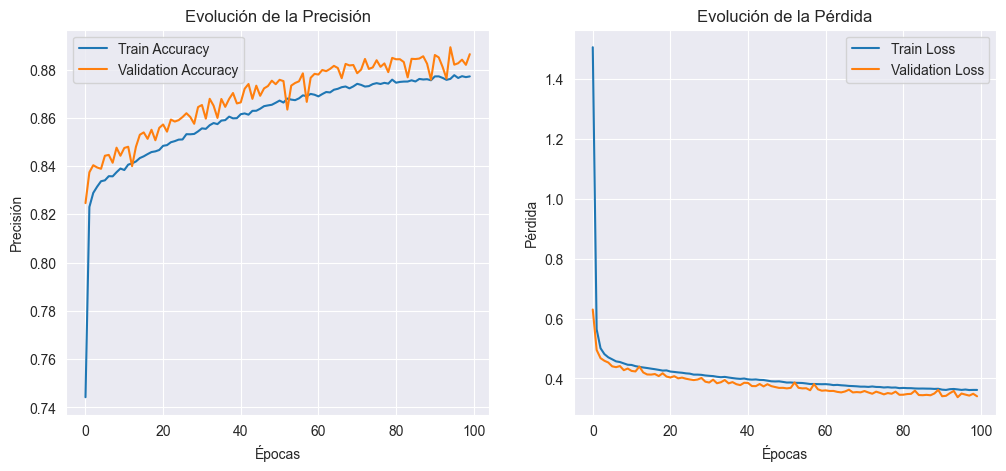

In [94]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """Grafica la evolución de la precisión y la pérdida en el entrenamiento"""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Gráfica de precisión
    axes[0].plot(history.history['accuracy'], label='Train Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title('Evolución de la Precisión')
    axes[0].set_xlabel('Épocas')
    axes[0].set_ylabel('Precisión')
    axes[0].legend()

    # Gráfica de pérdida
    axes[1].plot(history.history['loss'], label='Train Loss')
    axes[1].plot(history.history['val_loss'], label='Validation Loss')
    axes[1].set_title('Evolución de la Pérdida')
    axes[1].set_xlabel('Épocas')
    axes[1].set_ylabel('Pérdida')
    axes[1].legend()

    plt.show()

# Llamar a la función con el historial del modelo
plot_training_history(history)

1704/1704 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step


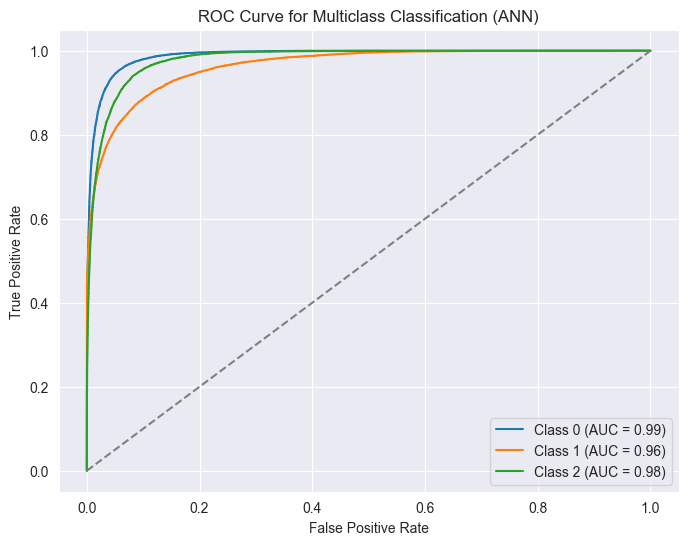

Macro AUC: 0.9774
Weighted AUC: 0.9767


In [95]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Binarizar las etiquetas para one-vs-rest
y_test_bin = label_binarize(np.argmax(y_test, axis=1), classes=np.unique(np.argmax(y_test, axis=1)))  # Convertir y_test a clases
y_proba_ann = model.predict(X_test)

# Graficar la curva ROC por cada clase
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(np.unique(np.argmax(y_test, axis=1))):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_ann[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiclass Classification (ANN)")
plt.legend()
plt.show()

# Calcular AUC macro y weighted
macro_auc = roc_auc_score(y_test_bin, y_proba_ann, average="macro")
weighted_auc = roc_auc_score(y_test_bin, y_proba_ann, average="weighted")
print(f"Macro AUC: {macro_auc:.4f}")
print(f"Weighted AUC: {weighted_auc:.4f}")

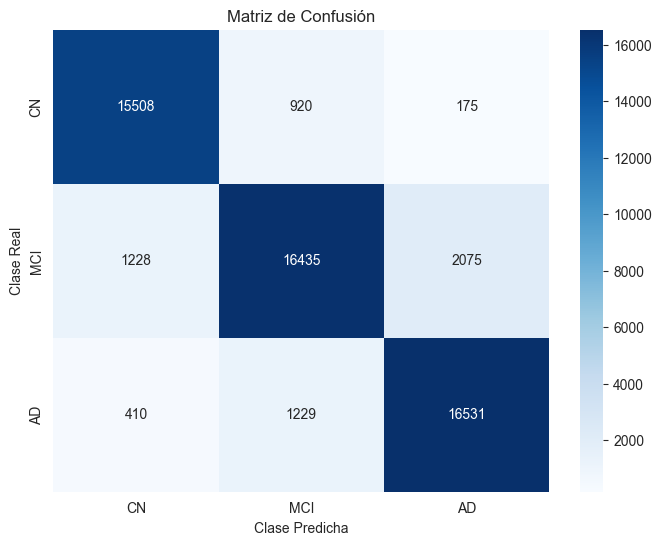

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predecir las clases
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["CN", "MCI", "AD"], yticklabels=["CN", "MCI", "AD"])
plt.title('Matriz de Confusión')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.show()


In [100]:
def generar_paciente_random(df, features, age_features, scaler):
    paciente_random = df.sample(n=1, random_state=np.random.randint(0, 10000)).copy()
    paciente_random = paciente_random[features]
    paciente_random[age_features] = scaler.transform(paciente_random[age_features])
    return paciente_random

In [101]:
# Definir las clases
clases = ['CN', 'MCI', 'AD']

# Generar paciente aleatorio
paciente_random = generar_paciente_random(df_datosjuntos_balanceado, features, age_features, scaler)

# Predecir
input_random = paciente_random.values
pred_random = model.predict(input_random)
clase_pred_random = np.argmax(pred_random, axis=1)[0]

# Interpretación
print(f"Diagnóstico Predicho: {clases[clase_pred_random]}")

print("\nProbabilidades por clase:")
for i, prob in enumerate(pred_random[0]):
    print(f"{clases[i]}: {prob * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Diagnóstico Predicho: AD

Probabilidades por clase:
CN: 0.52%
MCI: 23.04%
AD: 76.43%


In [102]:
import pandas as pd

# Mostrar los datos del paciente random de forma legible
pd.set_option('display.max_rows', None)  # Para que no se corte
display(paciente_random.T)


,449600
DXMPTR1,1.000000
DXPARK,0.000000
NXVISUAL,2.000000
NXAUDITO,2.000000
NXTREMOR,1.000000
NXCONSCI,1.000000
NXNERVE,1.000000
NXMOTOR,1.000000
NXFINGER,2.000000
NXHEEL,2.000000
